# IE582 Project Report || Gender Prediction Using Clickstream Data
## Group 3
### Yasemin Aylin Akturk
### Melikenur Sener

For the codes please check: https://github.com/BU-IE-582/fall21-yaseminaylinakturk/tree/gh-pages/Project

##################################################################################################
### 1. INTRODUCTION

1.1. Descriptive Analysis

    1.1.1. A Quick Glance Into the Unstructured Data

    1.1.2. Duplicate Check

    1.1.3. Missing Values & Imputation

    1.1.4. Obtaining a Structured Data set
    
1.2. Correlation Between Features

1.3. Scaling

1.4. Class Imbalance

### 2. LITERATURE REVIEW

2.1.Clickstream Data and Gender Inference

2.2.Class Imbalance in Classification

2.3.Oversampling and Undersampling

2.4.SMOTE

2.5.Rose

2.6.Class Imbalance with R and Caret


### 3. APPROACH

3.1. Spliting Training Set Into Two Parts

3.2. Creating SMOTE/Rose on internal training data

3.3. Models

    3.3.1. Model example and performance calcultion on internal-test data
    
    3.3.2. Varible Importance
    
    3.3.3. Ensembled model example and performance calcultion on internal-test data

### 4. RESULTS

4.1. Performance on the internal-test data

    4.1.1. Performance of all models on internal-test data
    
    4.1.2. Average performance of model types on internal-test data
    
    4.1.3. Performance of sampling techniques on internal-test data

4.2. Performance on the predefined subset of the actual test data

4.3. Final model

### 5. CONCLUSION & FUTURE WORK
### 6. CODES
### 7. REFERENCES

##################################################################################################

# 1. INTRODUCTION

1.1. Descriptive Analysis

    1.1.1. A Quick Glance Into the Unstructured Data

    1.1.2. Duplicate Check

    1.1.3. Missing Values & Imputation

    1.1.4. Obtaining a Structured Data set
    
1.2. Correlation Between Features

1.3. Scaling

1.4. Class Imbalance

##################################################################################################

The given data set is a real world dataset. The provided data consists of actions of the users on an online webshop.


The aim is to build a classification model for the given data. 

The classification task is related to gender prediction for the customers of an online retailer. The target value "gender" consists of two classes which are “F:female”, and “M:male”.

It should be noted that the provided data is an unstrutured clickstream data. Prior to building models, the data needs to be transformed into a structured data frame. The steps of this transformation is explained the "Descriptive Analysis" section. 

The data is an imbalanced classification data, the number of "F" and "M" are not in-balance.

In such cases, one potential problem is not being able to learn/understand the pattern for the class with less samples.
There are a few popular techniques to deal with class imbalance. These method are brefily introduced in the "Literature Review" and "Approach" sections and used for model developement.

The proposed approach consists of two levels. First, the data is tranformed in to a structured data-frame. Then, the imbalance problem of the data set is addressed. Later, potential models were constructed and the model with the best performance measure (ROC & BAC) was selected.

## 1.1. Descriptive Analysis

This section provides descriptive analysis of the given data.

##################################################################################################

1.1.1. A Quick Glance Into the Unstructured Data

1.1.2. Duplicate Check

1.1.3. Missing Values & Imputation

1.1.4. Obtaining a Structured Data set

### 1.1.1. A Quick Glance Into the Unstructured Data

The provided data is an unstrutured clickstream data. Every action of users are recored, meaning that, each row presents an action of a user. 

First, the data needs to be structured, so that each unique users's actions are summarized in a single intance in the structured version of the data. The features need to represent the summary of the user's actions presented in the unformal clickstream data. 

By this way, each row can be represented by a unique user-feature1-feature-2...-gender of the user.

In [4]:
head(traindata)


dim(traindata) #5493268      19


time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
2020-12-02T22:26:14.023Z,39918893,favorite,3099.00,PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir Çamaşır Makinesi,8511,Electrolux,Beyaz Eşya,Unisex,1272,1071,Elektronik,1212,Beyaz Eşya,1272,Çamaşır Makinesi,F,425,train
2020-12-08T23:15:04.603Z,3558544,favorite,3079.00,WW90J5475FW A+++ 1400 Devir 9 kg Çamaşır Makinesi,3228,Samsung,Beyaz Eşya,,1272,1071,Elektronik,1212,Beyaz Eşya,1272,Çamaşır Makinesi,F,425,train
2020-12-05T16:19:01.157Z,31292729,favorite,3999.00,KM 9711 A++ 9 kg Çamaşır Kurutma Makinesi,10989,Vestel,Beyaz Eşya,Unisex,1276,1071,Elektronik,1212,Beyaz Eşya,1276,Kurutma Makinesi,F,425,train
2020-12-05T16:28:00Z,6363103,visit,2544.00,CMI 9710 A+++ 1000 Devir 9 kg Çamaşır Makinesi,10989,Vestel,Beyaz Eşya,,1272,1071,Elektronik,1212,Beyaz Eşya,1272,Çamaşır Makinesi,F,425,train
2020-12-02T22:26:59Z,39918893,visit,3099.00,PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir Çamaşır Makinesi,8511,Electrolux,Beyaz Eşya,Unisex,1272,1071,Elektronik,1212,Beyaz Eşya,1272,Çamaşır Makinesi,F,425,train
2020-11-03T21:04:11Z,32593071,visit,266.65,Siyah Kadın Abiye Ayakkabı 01AYH158420A100,59,Hotiç,Branded Shoes A,Kadın,431,403,Ayakkabı,430,Topuklu Ayakkabı,431,Abiye Ayakkabı,F,425,train


[1] 5493268      19

### 1.1.2. Duplicate Check

####  The training data is checked for duplicates, and the duplicates were removed. So that only unique rows remained to prevent bias.

In [158]:
orgtrain =traindata
a=as.data.table(orgtrain)
a[time_stamp=="2020-10-14T10:42:23Z" & unique_id == "714",] 

time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
2020-10-14T10:42:23Z,51730930,visit,279.95,Kadın Siyah Dolgulu Spor Çantası,4869,Oysho,İç Giyim,Kadın,369,368,Aksesuar,2872,Diğer Aksesuar,369,Diğer Aksesuarlar,F,714,train
2020-10-14T10:42:23Z,51730930,visit,279.95,Kadın Siyah Dolgulu Spor Çantası,4869,Oysho,İç Giyim,Kadın,369,368,Aksesuar,2872,Diğer Aksesuar,369,Diğer Aksesuarlar,F,714,train
2020-10-14T10:42:23Z,51730930,visit,279.95,Kadın Siyah Dolgulu Spor Çantası,4869,Oysho,İç Giyim,Kadın,369,368,Aksesuar,2872,Diğer Aksesuar,369,Diğer Aksesuarlar,F,714,train
2020-10-14T10:42:23Z,51730930,visit,279.95,Kadın Siyah Dolgulu Spor Çantası,4869,Oysho,İç Giyim,Kadın,369,368,Aksesuar,2872,Diğer Aksesuar,369,Diğer Aksesuarlar,F,714,train


In [ ]:
dim(traindata) #5493268      19

traindata= unique(orgtrain)   #only with distinct values.

dim(traindata)  #the dimension diminihes #2077356      19
length(unique(traindata$unique_id)) #5618


### 1.1.3. Missing Values & Imputation

#### The pattern of missing values was checked. 
#### It turns out that there are many missing values(NAs) in the unstrutured data set.

In [16]:
#fill empty ones with NA
traindata [traindata  == " "] <- NA
traindata [traindata  == ""] <- NA
traindata [2750:2755,]

,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
2750,2020-12-02T21:45:34Z,65186855,visit,9.37,D%c3%9c%c5%9eyer%c4%b0,8241,Düşyeri,Digital Goods,NA,3838,1071,Elektronik,2997,Dijital Kod & Ürünler,2999,Dijital Kart & Kupon,F,737,train
2751,2020-11-18T22:20:28Z,51168228,visit,29.90,Gece Külotu Lavanta Yağlı 5 Numara Junıor 24 Adet+lavanta Yağlı Masaj Ve Temizlik Havlusu 40 Yaprak,14552,Sleepy,Bebek Bezi & Mendil,Unisex,1002,1219,Süpermarket,2861,Anne & Bebek Bakım,998,Bebek Bakım,F,737,train
2752,2020-10-30T22:04:00Z,32686466,visit,158.99,Kadın Siyah Tulum 0KAK44468FK,842,Koton,Kadın A,Kadın,546,522,Giyim,1192,Salopet & Tulum,546,Tulum,F,737,train
2753,2020-11-21T21:15:36Z,47491162,search,219.90,"Vestel 42"""" 106 Ekran Tv Ekran Koruyucu 3 mm",944050,CORUIAN,TV & Görüntü Ses Sistemleri,NA,4009,1071,Elektronik,1221,"TV, Görüntü & Ses Sistemleri",1899,TV Aksesuarları,F,737,train
2754,2020-11-10T20:24:51Z,51170203,basket,139.99,Gece Külotu Lavanta Yağlı 5 Numara Junıor 120 Adet + Lavanta Yağlı Masaj Ve Temizlik Havlusu 5x40,14552,Sleepy,Bebek Bezi & Mendil,Unisex,1002,1219,Süpermarket,2861,Anne & Bebek Bakım,998,Bebek Bakım,F,737,train
2755,2020-10-14T11:44:06Z,6755897,visit,29.37,Sulphur Tirnak Yagi 56 Gr,948146,Mixup,Vücut Bakım,Unisex,748,1070,Kozmetik & Kişisel Bakım,670,Vücut Bakımı,748,El & Tırnak Bakımı,F,737,train


,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
2750,2020-12-02T21:45:34Z,65186855,visit,9.37,D%c3%9c%c5%9eyer%c4%b0,8241,Düşyeri,Digital Goods,NA,3838,1071,Elektronik,2997,Dijital Kod & Ürünler,2999,Dijital Kart & Kupon,F,737,train
2751,2020-11-18T22:20:28Z,51168228,visit,29.90,Gece Külotu Lavanta Yağlı 5 Numara Junıor 24 Adet+lavanta Yağlı Masaj Ve Temizlik Havlusu 40 Yaprak,14552,Sleepy,Bebek Bezi & Mendil,Unisex,1002,1219,Süpermarket,2861,Anne & Bebek Bakım,998,Bebek Bakım,F,737,train
2752,2020-10-30T22:04:00Z,32686466,visit,158.99,Kadın Siyah Tulum 0KAK44468FK,842,Koton,Kadın A,Kadın,546,522,Giyim,1192,Salopet & Tulum,546,Tulum,F,737,train
2753,2020-11-21T21:15:36Z,47491162,search,219.90,"Vestel 42"""" 106 Ekran Tv Ekran Koruyucu 3 mm",944050,CORUIAN,TV & Görüntü Ses Sistemleri,NA,4009,1071,Elektronik,1221,"TV, Görüntü & Ses Sistemleri",1899,TV Aksesuarları,F,737,train
2754,2020-11-10T20:24:51Z,51170203,basket,139.99,Gece Külotu Lavanta Yağlı 5 Numara Junıor 120 Adet + Lavanta Yağlı Masaj Ve Temizlik Havlusu 5x40,14552,Sleepy,Bebek Bezi & Mendil,Unisex,1002,1219,Süpermarket,2861,Anne & Bebek Bakım,998,Bebek Bakım,F,737,train
2755,2020-10-14T11:44:06Z,6755897,visit,29.37,Sulphur Tirnak Yagi 56 Gr,948146,Mixup,Vücut Bakım,Unisex,748,1070,Kozmetik & Kişisel Bakım,670,Vücut Bakımı,748,El & Tırnak Bakımı,F,737,train


In [17]:
#check NA #how many NA's
mynalist = cbind(
  lapply(
    lapply(traindata, is.na)
    , sum)
)
mynalist

time_stamp,0
contentid,2
user_action,0
sellingprice,32013
product_name,2184
brand_id,2184
brand_name,2184
businessunit,2184
product_gender,234595
category_id,2184
Level1_Category_Id,2184


Warning message in plot.aggr(res, ...):
"not enough horizontal space to display frequencies"


 Variables sorted by number of missings: 
             Variable        Count
       product_gender 1.129296e-01
         sellingprice 1.541045e-02
         product_name 1.051336e-03
             brand_id 1.051336e-03
           brand_name 1.051336e-03
         businessunit 1.051336e-03
          category_id 1.051336e-03
   Level1_Category_Id 1.051336e-03
 Level1_Category_Name 1.051336e-03
   Level2_Category_Id 1.051336e-03
 Level2_Category_Name 1.051336e-03
   Level3_Category_Id 1.051336e-03
 Level3_Category_Name 1.051336e-03
            contentid 9.627623e-07
           time_stamp 0.000000e+00
          user_action 0.000000e+00
               gender 0.000000e+00
            unique_id 0.000000e+00
                 type 0.000000e+00


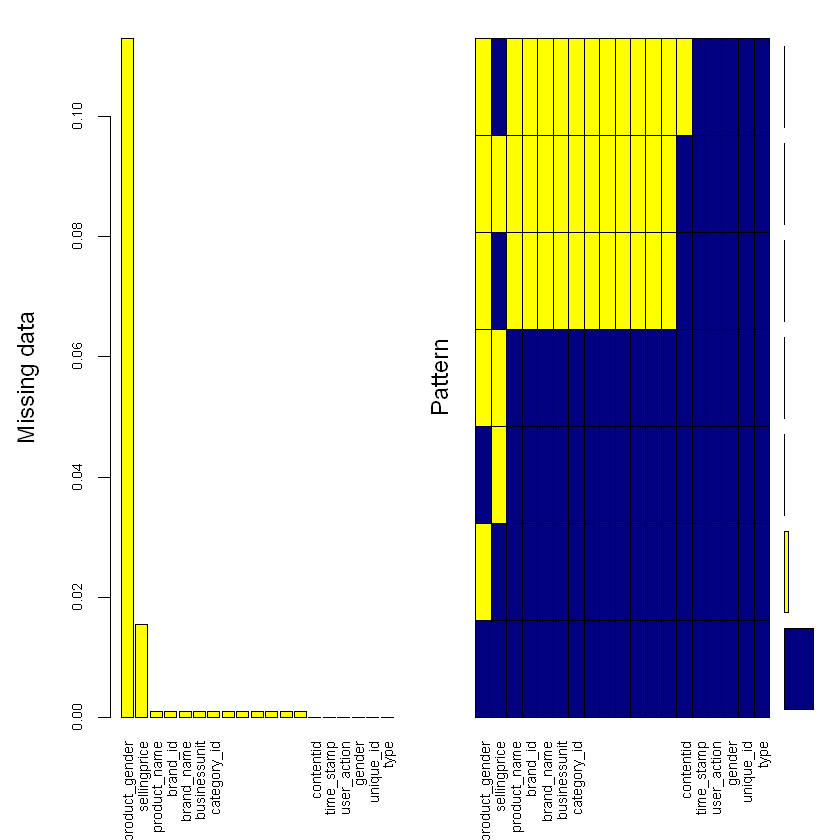

In [15]:
#pattern NA
library("VIM")
mice_plot <- aggr(traindata, col=c('navyblue','yellow'),
                  numbers=TRUE, sortVars=TRUE,
                  labels=names(traindata), cex.axis=.7,
                  gap=3, ylab=c("Missing data","Pattern"))

#### The missing data for product gender was imputed with the help of business unit. 

In [18]:
#try to fill the data for product gender with the help of business unit
missgender = traindata[,c(8,9)]
missgender$product_gender = ifelse(is.na(missgender$product_gender), "notavailable", missgender$product_gender )
table(missgender$businessunit, missgender$product_gender)

                                    
                                          2      3      4 notavailable
                                          0      0      0            0
  Aksesuar                                1      5     35            0
  Anne & Bebek Bakım                     85    479   3902          924
  Aydınlatma                              1     59   1477        12748
  Bahçe & Yapı Market & Hırdavat        397    192  11483         5901
  Bahçe Mobilyası                        11     20   3597          456
  Banyo                                 188    666  13901         4886
  Bebek Bezi & Mendil                     7     12   3717          549
  Beyaz Eşya                              7      4   4115         3030
  Bilgisayar & Tablet & Aksesuarları    131     82  10264         5785
  Books                                  28    166   9300         9030
  Branded Shoes A                     11621  28191   1203            4
  Branded Shoes B                     15

#### It was decided to replace all missing product genders with "unisex", since it seems appropirate given the above table.

In [20]:
#decided to replace all missing product genders with "unisex"
#it seems appropirate given the above table
filltrain = traindata
#filltrain[1,9]
filltrain[is.na(filltrain$product_gender), 9] = "Unisex"
table(filltrain$businessunit, filltrain$product_gender)
#now all missing product gender info is turned to unisex

                                    
                                             Erkek  Kadın Unisex
                                          0      0      0      0
  Aksesuar                                0      1      5     35
  Anne & Bebek Bakım                      0     85    479   4826
  Aydınlatma                              0      1     59  14225
  Bahçe & Yapı Market & Hırdavat          0    397    192  17384
  Bahçe Mobilyası                         0     11     20   4053
  Banyo                                   0    188    666  18787
  Bebek Bezi & Mendil                     0      7     12   4266
  Beyaz Eşya                              0      7      4   7145
  Bilgisayar & Tablet & Aksesuarları      0    131     82  16049
  Books                                   0     28    166  18330
  Branded Shoes A                         0  11621  28191   1207
  Branded Shoes B                         0  15706  79542  13429
  Büyük Beden                             0    201  1

#### Once the missing values for "product gender" is handled, the sales price needs to be imputed.

In [21]:
#we have NAs for sale price now
head(filltrain[is.na(filltrain$sellingprice ),])
noprice =  filltrain[is.na(filltrain$sellingprice ),]
#impute price of the product based on some info
#put the mean value of the corresponding category3 level
# for instance if a salesprice is missing and its Level3_Category_Name = "cuzdan" then get the mean for all "cuzdan" and put it there for the missing part.


,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
99,2020-10-31T22:45:36Z,53484812,visit,NA,Kapaklı Cüzdan 868206159546,8238,Vakko,Luxury,Kadın,1806,368,Aksesuar,435,Çanta,1806,Cüzdan,F,425,train
359,2020-11-26T19:58:31Z,33363293,search,NA,Siyah Kadın Bot & Bootie 01BOY164220A100,7658,Yaya by Hotiç,Branded Shoes A,Kadın,407,403,Ayakkabı,406,Bot & Çizme,407,Bot & Bootie,F,3273,train
443,2020-11-28T19:05:43Z,47112359,visit,NA,Güneş Gözlüğü,7675,Oakley,Gözlük B,Unisex,379,368,Aksesuar,2876,Gözlük,379,Güneş Gözlüğü,F,183,train
454,2020-11-10T15:36:31.267Z,47112359,favorite,NA,Güneş Gözlüğü,7675,Oakley,Gözlük B,Unisex,379,368,Aksesuar,2876,Gözlük,379,Güneş Gözlüğü,F,183,train
1134,2020-11-17T00:43:21Z,39654270,visit,NA,Nanoteknoloji Yüzey Dezenfektanı 500 Ml,37194,Antimic,Ev Bakım ve Temizlik,Kadın,2457,1219,Süpermarket,1382,Ev Bakım ve Temizlik,2438,Ev Temizlik,F,183,train
1240,2020-11-17T01:41:39Z,57512534,search,NA,TH ESSENCE HOBO,598,Tommy Hilfiger,Çanta & Valiz,Kadın,971,368,Aksesuar,435,Çanta,971,Omuz Çantası,F,183,train


#### The missing data for sales prive was imputed with the help of the mean price of the product's (3rd )category. 
#### Each level3_category's mean price was calculated and this price was imputed if the price of a product was missing.

In [23]:
#work on the salesprice and category3 only
#remove price NAs first
removeprc =  na.omit(filltrain)
priceimpute = removeprc [, c("sellingprice", "Level3_Category_Name")]
#head(priceimpute)
priceimpute = as.data.table(priceimpute)

summarized.price = priceimpute[, list(meanpriceforcat3 = mean(sellingprice)), by ="Level3_Category_Name"]
summarized.price [ order (Level3_Category_Name), ]
write.csv(summarized.price,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/summarized.price.csv", row.names = FALSE)


Level3_Category_Name,meanpriceforcat3
3D Yazıcı,495.68556
Abajur,157.49955
Abiye & Mezuniyet Elbisesi,461.19251
Abiye Ayakkabı,215.51959
Abiye Çanta,195.27773
Ağ - Modem - Akıllı Ev,90.94743
Ağda & Tüy Dökücü,43.44523
Ağız Çalkalama Suyu,36.53762
Ahşap Oyuncaklar,135.23123
Aile & Çocuk Bakımı,44.75000


#### For instance, anything with missing price and cat3 = "cuzdan" should be prices 127 tl which is the mean price of cat3="cuzdan"

In [25]:
#example:
#anything with missing price and cat3 = "cuzdan" should be 127 tl
summarized.price [ Level3_Category_Name =="CÃ¼zdan", ]
#before we had NA for price
traindata[ traindata$time_stamp =="2020-10-31T22:45:36Z", ][1,]
#after, we have the mean price within that category3
filledprice[filledprice$time_stamp =="2020-10-31T22:45:36Z",][1,]
#ok.done


Level3_Category_Name,meanpriceforcat3


,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,Level3_Category_Name,gender,unique_id,type
99,2020-10-31T22:45:36Z,53484812,visit,NA,Kapaklı Cüzdan 868206159546,8238,Vakko,Luxury,Kadın,1806,368,Aksesuar,435,Çanta,1806,Cüzdan,F,425,train


,Level3_Category_Name,time_stamp,contentid,user_action,sellingprice,product_name,brand_id,brand_name,businessunit,product_gender,category_id,Level1_Category_Id,Level1_Category_Name,Level2_Category_Id,Level2_Category_Name,Level3_Category_Id,gender,unique_id,type,meanpriceforcat3
395889,Cüzdan,2020-10-31T22:45:36Z,53484812,visit,127.078,Kapaklı Cüzdan 868206159546,8238,Vakko,Luxury,Kadın,1806,368,Aksesuar,435,Çanta,1806,F,425,train,127.078


#### Missing values are handled, now the data needs to be structured.

### 1.1.4. Obtaining a Structured Data Set

So far, the missing values have been handled, now the data needs to be structured, so that each unique user's actions are summarized in a single instance in the structured version of the data. 

The features need to represent the summary of the user's actions presented in the unformal clickstream data.

Data.table was vastly used to group/summarize the actions/preferences of the users. For the codes, please check the last section.

The resulting structured data set is presented below. 

In [36]:
finaltrain =   read.csv("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/finaltrainfeautures.csv", header = T, fileEncoding = 'UTF-8-BOM')
head(finaltrain)

gender,meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm
F,44.9900,12273,387,758,476,484,269,696,18.62069,92,3,1620,0,0,1279,25,316
F,97.4900,40,2248,522,896,1846,1417,913,14.30055,892,2,2617,0,0,1142,20,1455
F,149.9736,40,1182,522,1182,1182,22,232,12.31250,0,11,394,0,10,27,0,367
F,106.5884,4869,599,522,2871,1188,1977,1617,30.67039,130,56,5490,7,24,1313,164,4013
F,134.4550,31239,644,1070,641,642,801,1420,33.69672,1,10,4111,0,7,1145,17,2949
M,192.5394,7651,599,522,2871,1188,616,1185,23.67164,329,35,4758,11,3,2463,1173,1122


##### Once the unique IDs of the users are removed, the final training data set looks like given below. 
#### It is believed that these features accounts for the pattern that can differentiative Female and Male user from each other.
#### It should be noted that, while some features seem to be correlated, this issue is handled later on.


Gender: Gender of the user (F/M)

Meanprice: Average price of the products bought by the user (num)

Mostlovedbrand: ID of the brand the user mostly interacted with (cat->num)

Mostlovedbusinessunit: ID of the business unit the user mostly interacted with (cat->num)

Mostloved1: ID of the Level_1 Category the user mostly interacted with (cat->num)

Mostloved2: ID of the Level_2 Category the user mostly interacted with (cat->num)

Mostloved3: ID of the Level_3 Category the user mostly interacted with (cat->num)

Countwork: The number of actions of the user happening monday to friday within workhours (num)

Weekendcount: The number of actions of the user happening on saturday and sunday (num)

Searchhabbit: The number of times a user clicks within one category on average (~ search length for one purchase) (num)

Countfav: The number of actions of "fav" of the user (num)

Countfav: The number of actions of "order" of the user (num)

Countclick: The number of all actions of the user within the given timeframe (num)

Countfmorder: The number of "Female" products (prd.gender= F) bought by the user (num)

Countmlorder: The number of "Male" products (prd.gender= M) bought by the user (num)

Countuni: The number of "Unisex" products (prd.gender= U) interacted by the user (num)

Countml: The number of "Female" products (prd.gender= M) interacted by the user (num)

Countfm: The number of "Male" products (prd.gender= F) interacted by the user (num)

### 1.2. Correlation Between Features

While some features of the structured data set seem to be correlated, it should be noted that several feature elimination techniques was used while building the models. 

Permutation based variable importance guided by RF approach was used to eliminate some of the features and some of the models were trained on datasets that habe reduced number of features.

As another approach,  one of the the correlated variables given below are removed and a reduced dataset was created to train models. The findings are reported in the "Results" section.

corrplot 0.92 loaded


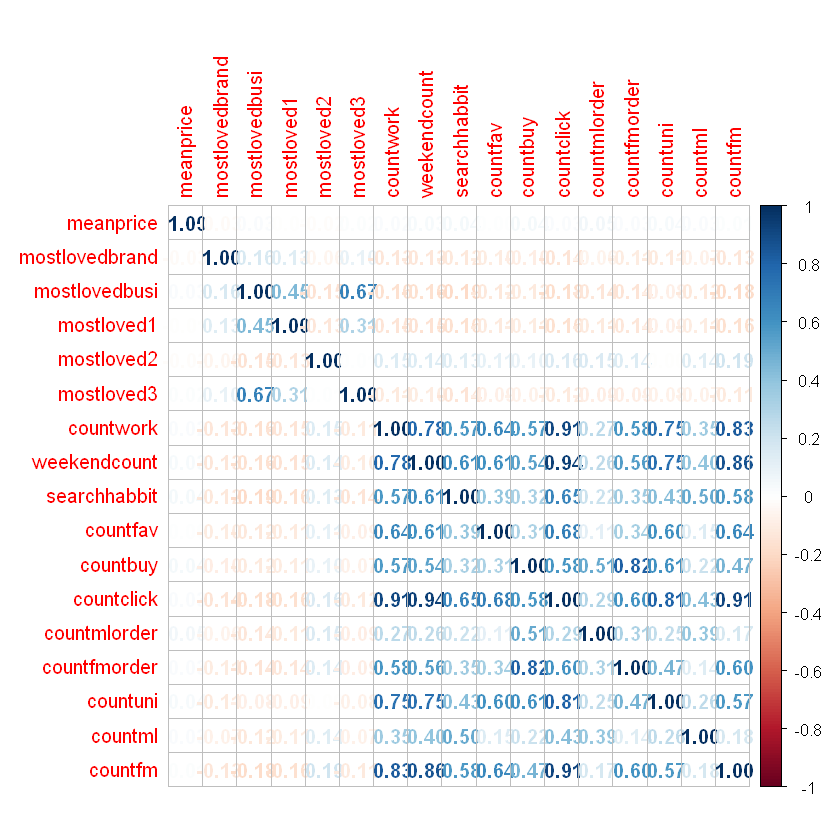

In [29]:
library(corrplot)
CM = cor(finaltrain[,-1])
corrplot(CM, method= "number") 
#mostly correlated

## 1.3. Scaling

#### Due to varying ranges of the columns, scaling of the data was necesaary.

In [37]:
finaltrain$gender = ifelse(finaltrain$gender == "F", 1, 0 ) 
finaltrainscl <- as.data.table(scale(finaltrain [,-c(1)]))
#head(finaltrainscl )
finaltrainsclall= cbind(finaltrainscl, finaltrain$gender)
colnames(finaltrainsclall)[18] <-  "genderfm" 
head(finaltrainsclall)
##need to do all for test data as well

meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm,genderfm
-0.10749353,-0.4160776,-0.9346050,-0.1922291,-1.1079141,-0.85809190,0.5653196,2.6132287,1.1877397,0.7188871,-0.1176754,1.60292940,-0.2948006,-0.3253907,3.8970465,-0.1238910,0.2542292,1
0.07447902,-0.4535825,0.8982811,-0.5214852,-0.7082836,0.64262339,4.8122619,3.5651796,0.6986384,9.6775681,-0.2186683,2.88118854,-0.2948006,-0.3253907,3.4286870,-0.1536652,2.4627980,1
0.25639484,-0.4535825,-0.1516150,-0.5214852,-0.4361543,-0.08900286,-0.3484389,0.5777207,0.4735635,-0.3113612,0.6902686,0.03106812,-0.2948006,1.9656798,-0.3831437,-0.2727620,0.3531203,1
0.10601535,-0.4387774,-0.7258077,-0.5214852,1.1709309,-0.08239178,6.8839411,6.6535365,2.5519361,1.1444245,5.2349532,6.56467749,3.4570861,5.1731785,4.0132817,0.7038318,7.4228674,1
0.20260502,-0.3579301,-0.6814875,0.2430586,-0.9509164,-0.68400011,2.5334148,5.7893230,2.8945594,-0.3001629,0.5892756,4.79665408,-0.2948006,1.2783586,3.4389431,-0.1715297,5.3597267,1
0.40393400,-0.4302481,-0.7258077,-0.5214852,1.1709309,-0.08239178,1.8490208,4.7584084,1.7595788,3.3728964,3.1141004,5.62617630,5.6010213,0.3619304,7.9447664,6.7122661,1.8170970,0


## 1.4. Class Imbalance

#### Below the class distribution can be seen. Almost 65% of the training data comes from "F" class and only the 35% comes from "M" cases.

#### The methods to improve performance on imbalanced data is discussed in the "Literature Review" section. 


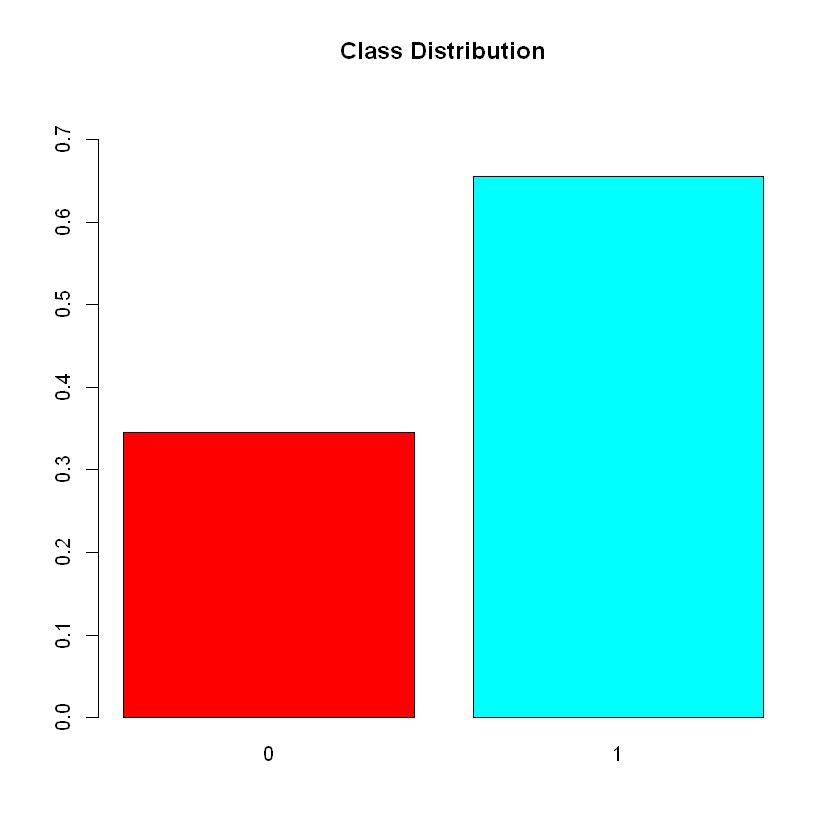

In [38]:
barplot(prop.table(table(finaltrainsclall$genderfm)),
        col = rainbow(2),
        ylim = c(0, 0.75),
        main = "Class Distribution")

#35-65

# 2. LITERATURE REVIEW

## 2.1.	Clickstream Data and Gender Inference

Digital traces left by individuals as they browse online can reveal who they are. Gender inference has a long history across numerous fields and extensive research on inferring gender in offline contexts existed before the digital-based studies. Predicting individuals’ demographic attributes from their online activity has so many benefits in fields like marketing. [1] In the project, clickstream data from a online webstore was used to predict a customer’s gender using classification methods. The results from this study can be used by the website for marketing purposes. 

## 2.2.	Class Imbalance in Classification

The class imbalance problem became one of the greatest issues in data mining. The class imbalance problem occurs when one of the two classes have more samples than the other class. [2] The class that has more sample is called the major class while the one that has fewer sample is called the minor class. [3] If there is a class imbalance issue, then the classifier is biased towards the majority class and show very poor performance on the minority class or may even ignore it. There are three different methods for the classification of imbalanced data sets, and they are the algorithmic approach, data-preprocessing approach, and feature selection approach and each method has its advantages. In the data-preprocessing approach, sampling is applied to data which means adding new samples or removing the existing samples from data to prevent the class imbalance. The process of adding new samples is known as oversampling and the process of removing samples is known as undersampling.[2] 

## 2.3.	Oversampling and Undersampling

Sampling can be achieved in two major ways, by undersampling the majority class or oversampling the minority class, or by combining both techniques. The creation of new data can be done randomly or by following a criterion to get new data for the minority class. The advantage of using this is that no data is lost but, this also may cause overfitting. The random oversampling method balances class distribution by replicating minority class samples so basically, it reuses the existing data. The undersampling method extracts data from the majority class to balance the class distributions in the dataset. The random undersampling method tries to balance the distribution of classes by randomly removing majority class samples but this method can cause loss of valuable information and lower accuracy in the final model. [2] For the project, both undersampling and oversampling methods are tried and the performances are reported. 

## 2.4.	SMOTE

SMOTE (Synthetic Minority Oversampling Technique) proposes an oversampling approach in which the minority class is oversampled by creating synthetic examples rather than by oversampling with replacement. The minority class is oversampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k-minority class nearest neighbors. Undersampling of the majority class has been proposed as a good means of increasing the sensitivity of a classifier to the minority class. A combination of the method of oversampling the minority class and undersampling the majority class can achieve better classifier performance in ROC space than only undersampling the majority class. [4] In the project, several Smote approaches were utilized and the findings are reported.

## 2.5.	Rose

The ROSE (Random Over-Sampling Examples) package provides functions to deal with binary classification problems in the presence of imbalanced classes. ROSE helps to reduce the seriousness of the effects of class imbalance by aiding both model estimation and model assessment phases. ROSE algorithm generates new artificial data to reduce the risk of overfitting and to improve the ability of generalization compromised by oversampling methods. These artificial balanced samples are generated according to a smoothed bootstrap approach and allow for aiding both estimation and accuracy evaluation phases of a binary classifier when a minor class exists. To avoid an arbitrary choice of the threshold, a ROC curve can be used to measure the accuracy. [5] ROSE package was used in the project to generate artifical sets of balanced data.

## 2.6.	Class Imbalance with R and Caret

The caret package (classification and regression training) contains tools for developing predictive models using the set of models available in R. The package focuses on simplifying model training and tuning across a wide variety of modeling techniques. It also includes methods for pre-processing training data, calculating variable importance, and model visualizations. The caret package was built to eliminate syntactical differences between many of the functions for building and predicting models, to develop a set of reasonable approaches for optimizing the values of the tuning parameters for many of these models. [6] For these reasons, mainly caret package was used to tune and train the models.


# 3. APPROACH

3.1. Spliting Training Set Into Two Parts

3.2. Creating SMOTE/Rose on internal training data

3.3. Models

    3.3.1. Model building on internal-train data and performance calcultion on internal-test data
    
    3.3.2. Varible Importance
    
    3.3.3. Ensembled model example and performance calcultion on internal-test data

##################################################################################################



In this section, the training data was split into sub-train& sub-test. 

The following sampling strategies were employed to build several models.

* Original data:
In order to make comparision, the original sub-trainig data without using any sampling methods was used to build a few models.

* Down-sampling:
Randomly remove instances in the majority class

* Up-sampling: 
Randomly replicate instances in the minority class

* Synthetic minority sampling technique (SMOTE): 
Down samples the majority class and synthesizes new minority instances by interpolating between existing ones. 

    * Smote1: Using K=1 neigborhood to get an artificial data set.

    * Smote2: Using K=2 neighborhood to get an artificial data set.

    *Rose: Implementing rose function to get an artificial data set.

* Class weights: 
Impose a heavier cost when errors are made in the minority class

Then, several models were trained on internal-train and tested on internal-test. 10-Fold cross validation was used. The effect of repeated cross validation with repeating 3 and 5 times were also check in several cases. No significant improvement on the final result was observed.

The BAC and ROC values are reported for the test set. It should be noted that the ROC and BAC values, especially in the artifically created Smote and Rose sets do not pose much importance, since the data sets in these cases are synthetic ( and most like to be predicted correctly). The evaluation should be made on the performance of the model on the internal-test set.

RF model was used to find the most importat features, permuation based features importance was used to select the most important features. Some models are developed in this next section based on only "more important" features selected by RF model, based on permutation based importance. 

Also, a few models were built that use dataset that has reduced number of   feature eliminated based on correlation.

Some model were entertained with pca-preprocessing.

Model such as;

 * Generalized Linear Model with Ridge and Lasso Regularization,
 * Random Forest,
 * Stochastic Gradient Boosting, 
 * Support Vecotr Machines,
 * knn Models,
 * Ensembled Models with combinations of CART, GLM, RF, SVM, GBM,
 * Additional models
     * Adaboost
     * Rda
     * Nnet
     * Naive_bayes
     
were trained and test.

The code for all models are provided below in the last section of this report. 

Their performances are gathered on a informative table and reported in the "Results" section.

Eventually, if the model is tuned and decided to be good enough,  the model is fitted on the (whole) actual train set and submitted for "testing" it on the actual test data.





## 3.1. Spliting Training Set Into Two Parts

The traing set is splited into two parts based on outcome: 75% training and 25% test.

The data proportions hold the imbalance pattern of the main data. 65%- 35% imbalance is observed.

,gender,meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm
1,1,44.9900,12273,387,758,476,484,269,696,18.620690,92,3,1620,0,0,1279,25,316
2,1,97.4900,40,2248,522,896,1846,1417,913,14.300546,892,2,2617,0,0,1142,20,1455
3,1,149.9736,40,1182,522,1182,1182,22,232,12.312500,0,11,394,0,10,27,0,367
5,1,134.4550,31239,644,1070,641,642,801,1420,33.696721,1,10,4111,0,7,1145,17,2949
7,1,0.0000,40,567,522,396,400,478,242,11.900000,232,0,952,0,0,245,0,707
9,0,42.4950,11079,407,368,435,2037,56,71,7.923077,0,2,309,1,0,211,95,3


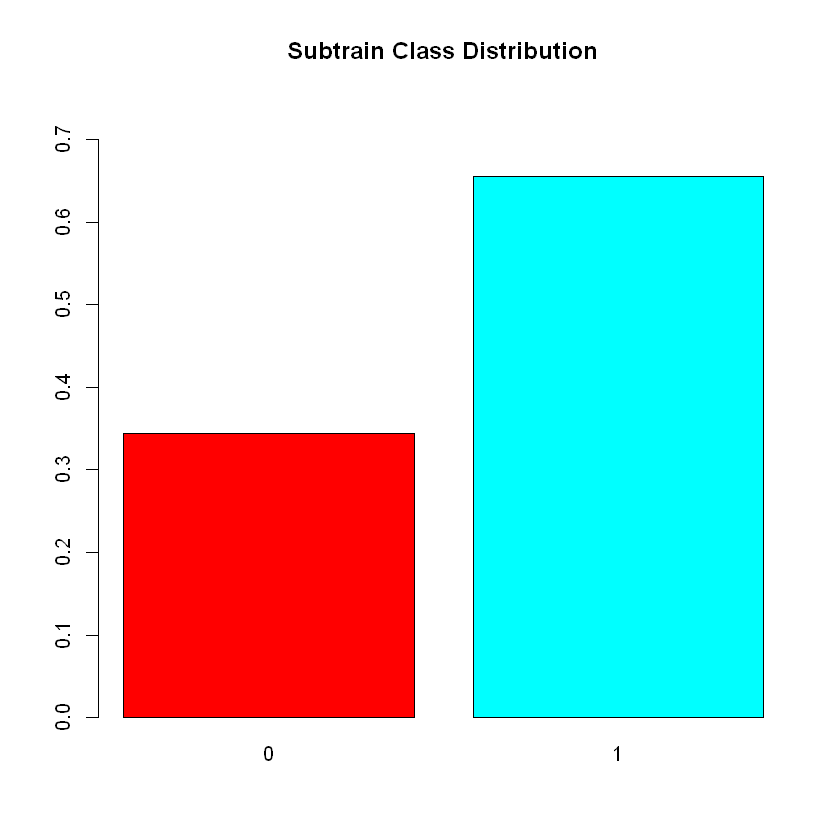

In [39]:
#Spliting training set into two parts based on outcome: 75% and 25%----
#internal train and test
set.seed(1234)
index <- createDataPartition(finaltrain$gender , p=0.75, list=FALSE)
inttrainSet <- finaltrain[ index,]
inttestSet <- finaltrain[-index,]
head(inttrainSet)

#show 

barplot(prop.table(table(inttrainSet$gender)),
        col = rainbow(2),
        ylim = c(0, 0.75),
        main = "Subtrain Class Distribution")


In [47]:
#scale
#internal train ----
sclinttrainSet <- as.data.table(scale(inttrainSet[,-c(1)]))
#head(sclinttrainSet)
sclinttrainSetall = cbind(sclinttrainSet , inttrainSet$gender)
colnames(sclinttrainSetall)[18] <-  "genderfm" 
#sum(sclinttrainSetall$genderfm)
head(sclinttrainSetall)

meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm,genderfm
-0.09909021,-0.4213913,-0.9312599,-0.1946541,-1.1052386,-0.84976913,0.5708083,2.7290163,1.11834204,0.7528546,-0.1178081,1.67312481,-0.3057655,-0.3184638,4.1023092,-0.1181827,0.2654074,1
0.07709418,-0.4585540,0.8965696,-0.5208486,-0.7055629,0.64120146,4.8513064,3.7203268,0.65307967,10.0595646,-0.2146562,3.00315738,-0.3057655,-0.3184638,3.6096147,-0.1485344,2.5391279,1
0.25322367,-0.4585540,-0.1504300,-0.5208486,-0.4334028,-0.08567407,-0.3501699,0.6093477,0.43897491,-0.3174170,0.6569766,0.03759831,-0.3057655,1.9215734,-0.4002718,-0.2699410,0.3672158,1
0.20114478,-0.3637743,-0.6788407,0.2365859,-0.9482232,-0.67680778,2.5544538,6.0364302,2.74197116,-0.3057836,0.5601285,4.99620517,-0.3057655,1.2495623,3.6204036,-0.1667454,5.5215145,1
-0.25007185,-0.4585540,-0.7544683,-0.5208486,-1.1813674,-0.94172326,1.3500976,0.6550302,0.39455029,2.3815289,-0.4083523,0.78198966,-0.3057655,-0.3184638,0.3837240,-0.2699410,1.0459383,1
-0.10746317,-0.4250185,-0.9116164,-0.7337042,-1.1442546,0.85028764,-0.2233956,-0.1261408,-0.03374863,-0.3174170,-0.2146562,-0.07579463,0.2529925,-0.3184638,0.2614494,0.3067404,-0.3594165,0


In [46]:
##need to do all for test partition data as well ----
sclintestSet <- as.data.table(scale(inttestSet[,-c(1)]))
#head(inttestSet)
sclinttestSetall = cbind(sclintestSet , inttestSet$gender)
colnames(sclinttestSetall )[18] <-  "genderfm" 
head(sclinttestSetall)
###end split
#4214 train +1404 test
# 5618 full train checks out

meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm,genderfm
0.101263449,-0.4231713,-0.7339854,-0.5236333,1.1617704,-0.09251284,6.7227693,5.9700361,3.1309941,1.0200242,6.1124162,5.90633573,3.0999172,5.5719057,3.5266030,0.6444737,6.8519946,1
0.434378010,-0.4143933,-0.7339854,-0.5236333,1.1617704,-0.09251284,1.8035553,4.2638687,2.1724806,3.0370148,3.6433993,5.05999202,5.0248547,0.3908136,6.9881683,6.3394157,1.6698617,0
-0.171715728,-0.3939882,-0.7796558,-0.5236333,1.3747683,2.05177754,1.7854832,1.9534336,2.5390875,2.0133160,0.8216658,1.56940230,-0.2687235,0.8842510,1.2058493,-0.1739273,1.7702420,1
-0.011491827,-0.4384081,0.9031971,-0.5236333,-1.1155957,0.64697514,2.8987219,6.0845705,2.5741708,2.7937596,6.5827051,4.84956230,0.6937453,6.0653430,6.1212719,0.1421448,3.8280381,0
0.002891611,-0.4143933,-0.8074551,-0.5236333,-0.6078239,3.67460527,0.4373077,1.4400036,0.3705728,1.5065345,0.4689491,1.21213426,-0.2687235,-0.1026237,2.2112082,0.3114692,0.4635056,0
-0.311833908,-0.4109983,-0.7359711,-0.5236333,1.1617704,-0.75670342,-0.2385872,-0.1200338,0.2250822,-0.2976078,-0.4716288,0.01777216,-0.2687235,-0.3493424,-0.2540282,-0.2585895,0.2609525,1


## 3.2. Creating SMOTE/Rose on internal training data

#### Syntethic data was generated for the sub-train part. 
#### Smote1: Using K=1 neigborhood to get an artificial data set.
#### Smote2: Using K=2 neighborhood to get an artificial data set.
#### Rose: Implementing rose function to get an artificial data set.
#### Implementation of the above methods yield in data sets with balanced instances.

#### SMOTE1

In [65]:
#smote for internal training data ----
####train data set
#more female than male
#female twice as large as male
#dup_size	:The maximum times of synthetic minority instances over original majority instances in the oversampling
#duplicate once in order to equalize
#sclinttrainSetall$gender = ifelse(sclinttrainSetall$gender == "F", 1, 0 ) 
set.seed(1234)
newDataint <- SMOTE(X=sclinttrainSetall , target= sclinttrainSetall$genderfm, K=1, dup_size = 1 )
library("dplyr")
#verynew <- newData[["data"]] %>%select(-class)
verynewint <- newDataint[["data"]] 
#dim(verynewint)
verynewint  = verynewint [,-19]
#dim(newDataint[["data"]] )
#dim(verynewint)
classnowint <- verynewint  %>% group_by(genderfm) %>% summarize(count=n()) 
classnowint #balanced

usefinalint = verynewint

usefinalint$genderfm = ifelse(usefinalint$genderfm == "1", "F", "M" ) 

#usefinal$gender = ifelse(usefinal$gender == "F", "1", "0" ) 
#usefinalint

#already scaled

trainsclint = usefinalint

trainsclint= trainsclint[,-18] #only x
head(trainsclint)  #final smote internal train


genderfm,count
0,2900
1,2764


meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm
0.3299943,-0.4307116,1.9052643,0.2365859,-0.4153222,-0.69541755,-0.2494962,-0.4322136,-0.4697105,-0.2941502,-0.11780808,-0.4053012,-0.3057655,-0.3184638,-0.32474925,-0.1849564,-0.3654053
0.7432390,-0.4350710,-0.3537404,-0.6853280,-1.1585287,-0.31227533,-0.3874565,-0.1444138,0.1075720,-0.3174170,-0.21465617,-0.2785679,-0.3057655,-0.3184638,-0.04064070,-0.1363937,-0.3494353
0.0620430,-0.4532134,-0.7210743,-0.5208486,1.1738647,-0.72169016,0.3918328,0.6824397,0.2717768,-0.2708835,1.72230547,0.5885546,4.1642982,0.3535474,0.85843697,1.9882219,-0.2496232
0.1442120,2.5194491,0.4653943,2.7134521,-0.9168201,-0.30461248,-0.3911851,-0.4504866,-0.5639446,-0.3174170,-0.31150425,-0.4680008,0.2529925,-0.3184638,-0.46860167,-0.2274487,-0.3654053
0.1682671,-0.4133317,1.8708882,2.7093055,-0.8064334,-0.51260398,-0.3501699,-0.2129375,-0.4530810,-0.2825168,0.07588808,-0.3052486,-0.3057655,-0.3184638,-0.03344808,-0.2456597,-0.3574203
-0.2500719,-0.4586300,-0.7957196,3.1612783,1.4745731,-0.08457938,-0.3613559,-0.4504866,-0.7296308,-0.3174170,-0.40835233,-0.4626647,-0.3057655,-0.3184638,-0.45421643,-0.2274487,-0.3654053


#### SMOTE2

In [64]:
#another smote:Smote2
set.seed(1234)

newDataint2 <- SMOTE(X=sclinttrainSetall , target= sclinttrainSetall$gender, K=2, dup_size = 1 )

verynewint2 <- newDataint2[["data"]]
verynewint2 <- verynewint2 [,-19]
#dim(newDataint2[["data"]] )
#dim(verynewint2)
#classnowint2 <- verynewint2  %>% group_by(genderfm) %>% summarize(count=n()) 
classnowint2 #balanced

usefinalint2 = verynewint2

usefinalint2$genderfm = ifelse(usefinalint2$genderfm == "1", "F", "M" ) 
#usefinal$gender = ifelse(usefinal$gender == "F", "1", "0" ) 
#usefinalint2
#scale wo id and gender, all are cont. var.
trainsclint2  =  usefinalint2  #another final smote internal train

trainsclint2 = trainsclint2[,-18] #only x
head(trainsclint2)
#already scaled
#

genderfm,count
0,2900
1,2764


meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm
0.3299943,-0.4307116,1.9052643,0.2365859,-0.4153222,-0.69541755,-0.2494962,-0.4322136,-0.4697105,-0.2941502,-0.11780808,-0.4053012,-0.3057655,-0.3184638,-0.32474925,-0.1849564,-0.3654053
0.7432390,-0.4350710,-0.3537404,-0.6853280,-1.1585287,-0.31227533,-0.3874565,-0.1444138,0.1075720,-0.3174170,-0.21465617,-0.2785679,-0.3057655,-0.3184638,-0.04064070,-0.1363937,-0.3494353
0.0620430,-0.4532134,-0.7210743,-0.5208486,1.1738647,-0.72169016,0.3918328,0.6824397,0.2717768,-0.2708835,1.72230547,0.5885546,4.1642982,0.3535474,0.85843697,1.9882219,-0.2496232
0.1442120,2.5194491,0.4653943,2.7134521,-0.9168201,-0.30461248,-0.3911851,-0.4504866,-0.5639446,-0.3174170,-0.31150425,-0.4680008,0.2529925,-0.3184638,-0.46860167,-0.2274487,-0.3654053
0.1682671,-0.4133317,1.8708882,2.7093055,-0.8064334,-0.51260398,-0.3501699,-0.2129375,-0.4530810,-0.2825168,0.07588808,-0.3052486,-0.3057655,-0.3184638,-0.03344808,-0.2456597,-0.3574203
-0.2500719,-0.4586300,-0.7957196,3.1612783,1.4745731,-0.08457938,-0.3613559,-0.4504866,-0.7296308,-0.3174170,-0.40835233,-0.4626647,-0.3057655,-0.3184638,-0.45421643,-0.2274487,-0.3654053


#### ROSE

In [90]:
#rose data

table(sclinttrainSetall$genderfm) #imbalanced

#create rose data

rose_dataint <- ROSE(genderfm~., data = sclinttrainSetall, N = 5512, seed=1234)$data

table(rose_dataint$genderfm)  #balanced


   0    1 
1450 2764 


   0    1 
2730 2782 

##### Balanced synthetic data sets were generated.

## 3.3. Models

More than 50 models were built and tested. Some of them are posted below as examples.

Model such as;

 * Generalized Linear Model with Ridge and Lasso Regularization,
 * Random Forest,
 * Stochastic Gradient Boosting, 
 * Support Vecotr Machines,
 * knn Models,
 * Ensembled Models with combinations of CART, GLM, RF, SVM, GBM,
 * Additional models
     * Adaboost
     * Rda
     * Nnet
     * Naive_bayes
     
were trained and test.

The models were tuned on the internal training data and then tested on the internal-test data. 

The performance of the models on the test data based on BAC and ROC were reported.

### 3.3.1. Model building on internal-train data and performance calcultion on internal-test data

In [79]:
#MODEL-example

#models----

set.seed(1234)
intlog_reg_grid <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.00003))

TC2 <-trainControl(method="cv", number=10, classProbs = TRUE,summaryFunction=twoClassSummary)
log_reg2 <- train(x=as.matrix(trainsclint ,with = F ),y=as.matrix(usefinalint$genderfm, with = F),metric= c("ROC") ,method="glmnet",family='binomial',tuneGrid= log_reg_grid, trControl= TC2 )
log_reg2 


glmnet 

5664 samples
  17 predictor
   2 classes: 'F', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5097, 5098, 5097, 5097, 5097, 5098, ... 
Resampling results across tuning parameters:

  lambda   ROC        Sens       Spec     
  0.00100  0.8056597  0.5405418  0.9379310
  0.00103  0.8056784  0.5405418  0.9382759
  0.00106  0.8056959  0.5401795  0.9382759
  0.00109  0.8057059  0.5401795  0.9386207
  0.00112  0.8057047  0.5394574  0.9386207
  0.00115  0.8057196  0.5394574  0.9386207
  0.00118  0.8057059  0.5394574  0.9386207
  0.00121  0.8057333  0.5390951  0.9386207
  0.00124  0.8057645  0.5390951  0.9386207
  0.00127  0.8057795  0.5390951  0.9386207
  0.00130  0.8057696  0.5387341  0.9386207
  0.00133  0.8057746  0.5383731  0.9389655
  0.00136  0.8057833  0.5380108  0.9389655
  0.00139  0.8057871  0.5376498  0.9393103
  0.00142  0.8058357  0.5372874  0.9393103
  0.00145  0.8058520  0.5372874  0.9396552
  0.00148  0.8058658  0.5372874  0.940

#### BAC calculation on test data

In [80]:
#BAC
confusionMatrix(predict(log_reg2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


Confusion Matrix and Statistics

          Reference
Prediction   F   M
         F 505  46
         M 410 443
                                        
               Accuracy : 0.6752        
                 95% CI : (0.65, 0.6997)
    No Information Rate : 0.6517        
    P-Value [Acc > NIR] : 0.03381       
                                        
                  Kappa : 0.3902        
                                        
 Mcnemar's Test P-Value : < 2e-16       
                                        
            Sensitivity : 0.5519        
            Specificity : 0.9059        
         Pos Pred Value : 0.9165        
         Neg Pred Value : 0.5193        
             Prevalence : 0.6517        
         Detection Rate : 0.3597        
   Detection Prevalence : 0.3925        
      Balanced Accuracy : 0.7289        
                                        
       'Positive' Class : F             
                                        

#### ROC calculation on test data

In [81]:
#"ROC curve and AUC"
predicted = predict(log_reg2, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc

Setting levels: control = F, case = M
Setting direction: controls > cases


Area under the curve: 0.8012

### 3.3.2. Varible Importance

RF model was used to find the most importat features, permuation based features importance was used to select the most important features.

A dataset with less features was built and some of the models were trained and tested on this reduced sets with the most important features.

Some models are developed in this next section based on only "more important" features selected by RF model, based on permutation based importance.



In [87]:
#model3
set.seed(1234)

grid_RF <- expand.grid(mtry = c(4:17) ,min.node.size=5, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_mod <- train(x=as.matrix(trainsclint ,with = F ),y=as.matrix(usefinalint$genderfm, with = F) ,method="ranger",metric="ROC", tuneGrid= grid_RF, trControl= Traincontrol_RF)
RF_mod


Random Forest 

5664 samples
  17 predictor
   2 classes: 'F', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5097, 5098, 5097, 5097, 5097, 5098, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   4    0.9183924  0.7908845  0.8858621
   5    0.9173299  0.7894391  0.8844828
   6    0.9167506  0.7905248  0.8848276
   7    0.9160044  0.7890755  0.8851724
   8    0.9156124  0.7865406  0.8855172
   9    0.9149808  0.7887053  0.8875862
  10    0.9149191  0.7847251  0.8855172
  11    0.9142285  0.7840043  0.8851724
  12    0.9140141  0.7865353  0.8865517
  13    0.9133813  0.7840070  0.8858621
  14    0.9136942  0.7854549  0.8844828
  15    0.9131584  0.7879807  0.8848276
  16    0.9126088  0.7865393  0.8834483
  17    0.9112599  0.7847237  0.8827586

Tuning parameter 'splitrule' was held constant at a value of gini

Tuning parameter 'min.node.size' was held constant at a value of 5
ROC was used to select the 

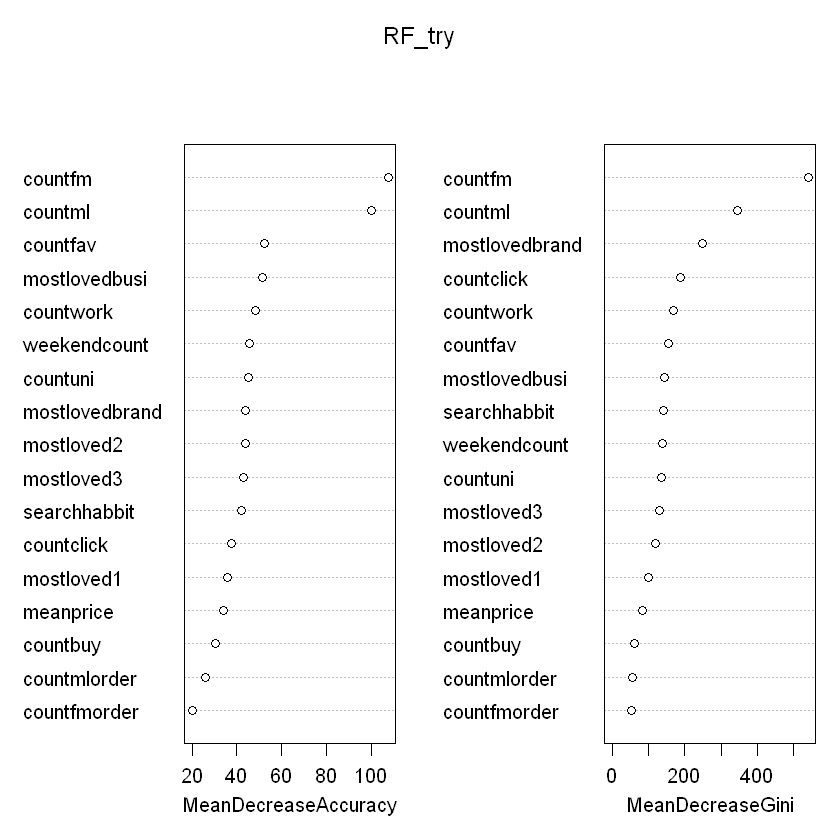

In [83]:
RF_try=randomForest(x=as.matrix(trainsclint ,with = F ),y=as.factor(as.matrix(usefinalint$genderfm, with = F)),
                    min.node.size=5, splitrule = "gini",
                    mtry = 4, 
                    importance=TRUE, localImp=TRUE) 


varImpPlot(RF_try)

#### Count of interaction with female/male products seem to be the  most important 2 features (as expected). 

#### BAC calculation on test data

In [85]:
#BAC
confusionMatrix(predict(RF_mod, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


Confusion Matrix and Statistics

          Reference
Prediction   F   M
         F 796 218
         M 119 271
                                          
               Accuracy : 0.76            
                 95% CI : (0.7367, 0.7821)
    No Information Rate : 0.6517          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4451          
                                          
 Mcnemar's Test P-Value : 9.377e-08       
                                          
            Sensitivity : 0.8699          
            Specificity : 0.5542          
         Pos Pred Value : 0.7850          
         Neg Pred Value : 0.6949          
             Prevalence : 0.6517          
         Detection Rate : 0.5670          
   Detection Prevalence : 0.7222          
      Balanced Accuracy : 0.7121          
                                          
       'Positive' Class : F               
                              

#### ROC calculation on test data

In [86]:

#"ROC curve and AUC"
predicted = predict(RF_mod, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc


Setting levels: control = F, case = M
Setting direction: controls > cases


Area under the curve: 0.832

### 3.3.3. Ensembled model example and performance calcultion on internal-test data

In [ ]:
#ensemble with down sampling


set.seed(1234)


control_stacking <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking$sampling <- "down"

algorithms_to_use <- c('rpart', 'glm', 'ranger', 'svmRadial')



stacked_models <- caretList(
  genderfm ~ .,
  data = sclinttrainSetall ,
  trControl=control_stacking, 
  methodList=algorithms_to_use)

stacking_results <- resamples(stacked_models)



summary(stacking_results)

glm_stack <- caretStack(stacked_models, method="glm", metric="ROC", trControl=control_stacking )



In [ ]:
> print(glm_stack)
A glm ensemble of 4 base models: rpart, glm, ranger, svmRadial

Ensemble results:
Generalized Linear Model 

21070 samples
    4 predictor
    2 classes: 'F', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 18963, 18963, 18963, 18963, 18963, 18963, ... 
Addtional sampling using down-sampling

Resampling results:

  ROC        Sens       Spec     
  0.8560494  0.7395791  0.8401646

#### BAC calculation of test data

In [ ]:
#BAC
confusionMatrix(predict(glm_stack, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')

Confusion Matrix and Statistics

          Reference
Prediction   F   M
         F 828 259
         M  95 222
                                          
               Accuracy : 0.7479          
                 95% CI : (0.7243, 0.7704)
    No Information Rate : 0.6574          
    P-Value [Acc > NIR] : 1.516e-13       
                                          
                  Kappa : 0.3905          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8971          
            Specificity : 0.4615          
         Pos Pred Value : 0.7617          
         Neg Pred Value : 0.7003          
             Prevalence : 0.6574          
         Detection Rate : 0.5897          
   Detection Prevalence : 0.7742          
      Balanced Accuracy : 0.6793          
                                          
       'Positive' Class : F   


#### ROC calculation on test data

In [ ]:
#"ROC curve and AUC"
predicted = predict(glm_stack, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc

Area under the curve: 0.8177

#### The codes for all models are provided below in the last section of this report. 
#### Their performances are gathered on an informative summary table and reported in the "Results" section.

# 4. RESULTS


4.1. Performance on the internal-test data

4.2. Performance on the predefined subset of the actual test data

4.3. Final model

######################################################################################

To review the actions taken so far, first the data set is tranformed into a structured dat set. 

The structured data set is then splited into internal train and test partitions.

Then, it is attempted to address the imbalance problem by employing several sampling techniques. Several synthetic data set with balanaced number of instances were created, or up/down/weighted sampling was utilized.


More than 50 model such as;

 * Generalized Linear Model with Ridge and Lasso Regularization,
 * Random Forest,
 * Stochastic Gradient Boosting, 
 * Support Vecotr Machines,
 * knn Models,
 * Ensembled Models with combinations of CART, GLM, RF, SVM, GBM,
 * Additional models
     * Adaboost
     * Rda
     * Nnet
     * Naive_bayes
     
were trained and test.

In some of the models pca-preprocessing is included.


Some of the models were trained with reduced number of features. Using permutation based importance by RF models, the data set's dimension is reduced and this version was used to build several models. 

Some of the model were trained with reduced number of features where the feature elimantion was correlation based. The correlated features were removed and models were trained.


The performance measures obtained from these models range from 60 % to 80 %.




## 4.1. Performance on the internal-test data

#### The test performances of the models are tabled below.

#### Model-no / ModelName/ ModelDesc / Modeltype/ Sampling method/ Tuning grid /Training results / Test performance is reported.

For fair comparision, the same random seed was utilized in each case.

The models are judged by their performance on the internal-test set, rather than their performance on the training set. It should be noted that in most of the cases the models were trained on synthetic data, therefore prediction results on artificial data should not be evaluated while comparing the models.

In general ROC(AUC) is larger than BAC for the models.

The performance measures obtained from these models range from  60% to 80%.

### 4.1.1. Performance of all models on internal-test data

Performance of all models are presented below.

In [166]:
Internaltestperf<- read.csv2("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/Internaltesttrain2.csv")
Internaltestperf

ï..ModelNo,ModelName,ModelDescription,Model.type,Sampling.method,Tuning.method,Best.tuned.ROC.on.internal.train,Best.tuned.Sens..on.internal.train,Best.tunedSpec..on.internal.train,Test.perf..ROC,Test.perf..BAC,Avg..of.ROC.BAC.on.test,Notes
1,logreg2,Lasso LR with smote-data1,GLM,Smote1,"alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.00003)",0.8058658,0.5372874,0.9400000,0.8011,0.7289,75%,
2,logreg3,Elastic Net LR with smote-data1,GLM,Smote1,"alpha = c(0,0.5,1), lambda= seq( from = 0.001, to =0.003, by = 0.00003))",0.8094019,0.5366667,0.9451408,0.7913,0.7383,75%,
3,RF_mod,RF with smote-data1,RF,Smote1,"mtry = c(4:17) ,min.node.size=5, splitrule = ""gini""",0.9183924,0.7908845,0.8858621,0.8320,0.7121,74%,
4,RF_node,RF with smote-data1,RF,Smote1,"mtry = c(4:17) ,min.node.size=1, splitrule = ""gini""",0.9241787,0.7924559,0.8957562,0.797,0.6762,71%,
5,RF_node1,RF with smote-data1 [reduced number of features based on varImp],RF,Smote1,"mtry = c(1:8) ,min.node.size=1, splitrule = ""gini""",0.9012131,0.7572477,0.8676329,0.7859,0.6701,70%,Reducing features losses info (&ROC)
6,gbm_node1,GBM with smote-data1 [reduced number of features based on varImp],GBM,Smote1,"interaction.depth = c( 3, 5), n.trees = c(1:5)*100, shrinkage = c(0.05,0.1), n.minobsinnode = c(1, 3, 5)",0.9010125,0.7681383,0.8556160,0.7606,0.6724,69%,Reducing features losses info (&ROC)
7,RF_node11,RF with smote-data1 [reduced number of features based on varImp],RF,Smote1,"mtry = c(1:8) ,min.node.size=1, splitrule = ""gini""",0.9012131,0.7572477,0.8676329,0.7859,0.6701,70%,Reducing features losses info (&ROC)
8,RF_node_few,RF with smote-data1 [reduced number of features based on correlation],RF,Smote1,"mtry = c(1:8) ,min.node.size=1, splitrule = ""gini""",0.9122768,0.7841370,0.8772372,0.7877,0.6762,70%,Reducing features losses info (&ROC)
9,gboost,GBM with smote-data1,GBM,Smote1,"interaction.depth = c( 3, 5), n.trees = c(1:5)*100, shrinkage = c(0.05,0.1), n.minobsinnode = 10",0.9126643,0.8004466,0.8727699,0.7902,0.7023,72%,
10,svm_radial_mod,SVM (radial) with smote-data1,SVM,Smote1,tuneLength = 5,0.8433563,0.6637315,0.8823181,0.7916,0.7149,73%,


### 4.1.2. Average performance of all model types on internal-test data

The models are grouped by type and average performance of all models are presented below.

In [167]:
Modeltypeperf<- read.csv2("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/modeltype.csv")
Modeltypeperf

ï..Model.type,Avg..of.ROC.BAC.on.test
Adaboost,"70,5%"
Ensemble,"70,8%"
GBM,"70,1%"
GLM,"74,9%"
KNN,"67,1%"
Naive bayes,"65,0%"
Nnet,"66,0%"
RF,"70,0%"
SVM,"67,2%"


### 4.1.3. Performance of sampling techniques on internal-test data

The models are grouped by sampling type and average performance of all models generated by this sampling method are presented below.

In [168]:
samplingtypeperf<- read.csv2("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/samplingtype.csv")
samplingtypeperf

ï..Sampling.method,Avg..of.ROC.BAC.on.testdata
Down-sampling,"70,66%"
Inverse class wieghts,"68,30%"
Rose,"62,91%"
Smote1,"69,92%"
Smote2,"72,18%"
Up-sampling,"70,08%"
Weigthed,"67,51%"


#### In general, glm and ensembled glm methods provided the best results.

## 4.2. Performance on the predefined subset of the actual test data

#### The actual test data has been through the same processes as the training set. The same summaries are extracted from the unstrcutured data set. The test set is transformed into the structured set presented below and scaled.

In [49]:
head(finaltest)

unique_id,meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm
9,128.64545,40,1182,522,2867,1187,80,366,19.05814,46,11,1639,1,9,197,91,1351
18,56.09559,40,599,522,2871,1188,3653,2704,44.12174,428,161,10148,17,87,2019,728,7401
21,142.23250,40,407,522,406,407,417,665,20.60000,272,8,2163,0,7,492,193,1478
25,131.11333,40,1182,522,1182,1182,142,637,14.87671,79,6,1086,0,1,350,48,688
31,121.21211,40,408,522,896,516,742,2604,38.71362,227,19,8246,1,7,4295,114,3837
32,89.88083,40,3110,522,2871,3096,224,391,13.45545,125,12,1359,0,7,317,2,1040


In [50]:
testscl <- as.data.table(scale(finaltest [,-c(1)])) #noids
head(testscl)

meanprice,mostlovedbrand,mostlovedbusi,mostloved1,mostloved2,mostloved3,countwork,weekendcount,searchhabbit,countfav,countbuy,countclick,countmlorder,countfmorder,countuni,countml,countfm
0.18575550,-0.4385285,-0.1319750,-0.5006,1.1225612,-0.09666635,-0.14793420,1.316559,1.4941882,0.1830836,0.8457244,1.813243,0.3032454,1.90394656,0.1996109,0.44561185,2.430122
-0.07047616,-0.4385285,-0.7082825,-0.5006,1.1263292,-0.09560068,14.07166768,12.851665,4.9231121,4.5552389,18.9912629,13.961041,10.0727771,21.36269130,6.8364632,6.36235992,15.024947
0.23374224,-0.4385285,-0.8980784,-0.5006,-1.1956795,-0.92788705,1.19323732,2.791750,1.7051284,2.7697514,0.4828136,2.561327,-0.3073503,1.40500439,1.2741836,1.39303462,2.694509
0.19447156,-0.4385285,-0.1319750,-0.5006,-0.4646942,-0.10199468,0.09880952,2.653605,0.9221316,0.5607829,0.2408731,1.023757,-0.3073503,-0.09182213,0.7569317,0.04620813,1.049895
0.15950240,-0.4385285,-0.8970899,-0.5006,-0.7341037,-0.81172929,2.48665199,12.358290,4.1832325,2.2547069,1.8134865,11.245667,0.3032454,1.40500439,15.1270647,0.65924639,7.605450
0.04884659,-0.4385285,1.7738927,-0.5006,1.1263292,1.93769304,0.42514799,1.439902,0.7276897,1.0872728,0.9666947,1.413503,-0.3073503,1.40500439,0.6367253,-0.38106096,1.782685


####  The previosly established tuned models are fitted on the (whole) actual train set (sampling applied) and submitted for "testing" it on the actual test data. The models performance on the partial test data is presented below.

In [148]:
testperf<- read.csv2("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/testactual.csv")
testperf

ï..Modelname,AUC,BAC,Performance
GLM_Stack,0.8447286,0.7733376,0.8090331
glm_stack9,0.8466610,0.7694160,0.8080385
glm_stack10,0.8483909,0.7676044,0.8079977
glm_s_rs,0.8402600,0.7746910,0.8074755
glm_stack2,0.8440182,0.7668585,0.8054383
down_fit_RF2,0.8431053,0.7660912,0.8045983
RF_stack_down,0.8371199,0.7662511,0.8016855
svm_stack_down,0.8371199,0.7662511,0.8016855
rf_stack,0.8371199,0.7662511,0.8016855
svm_stack,0.8371199,0.7662511,0.8016855


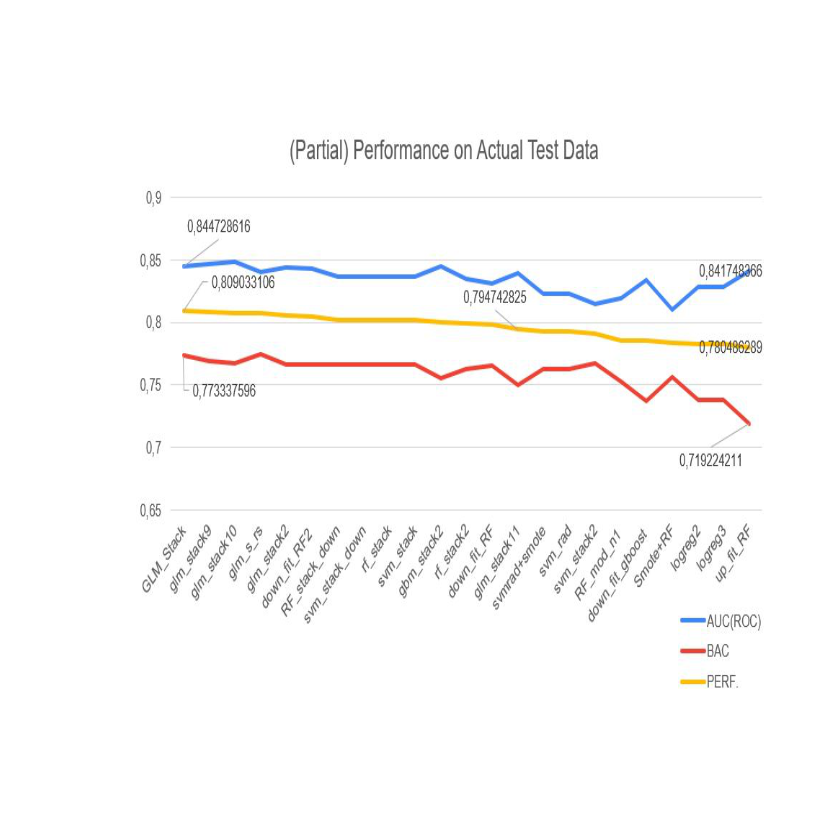

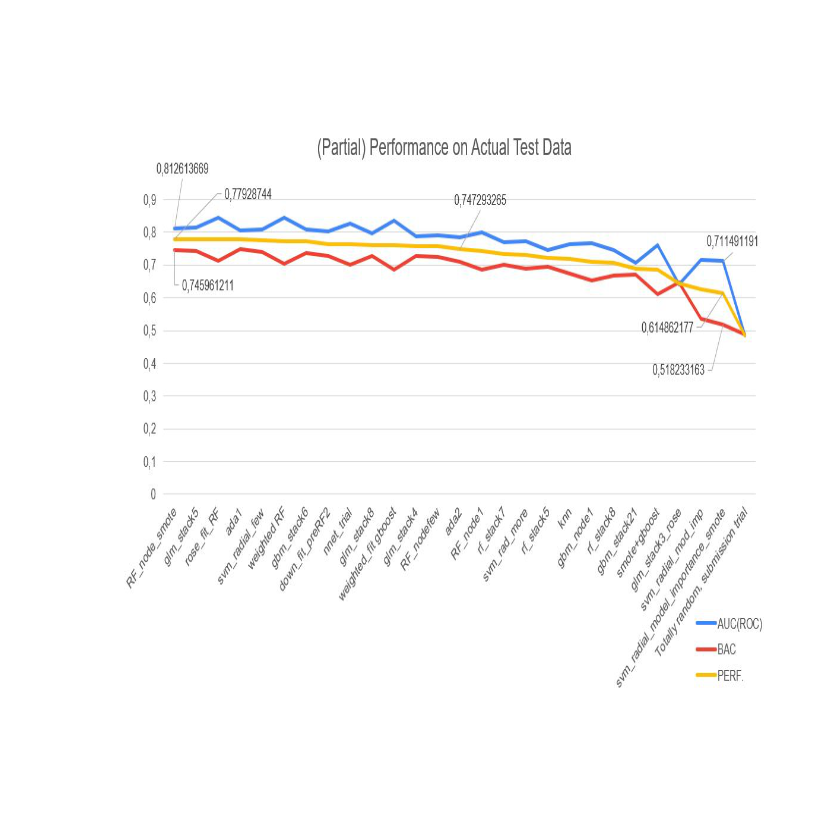

In [153]:
Testperfpart1 = readJPEG("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/part1.JPG")
Testperfpart2 = readJPEG("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/part2.JPG")
plot(0:1000,0:1000,type="n",axes=FALSE,xlab='',ylab='', main="")
rasterImage(Testperfpart1 ,0,0,1000,1000)
plot(0:1000,0:1000,type="n",axes=FALSE,xlab='',ylab='', main="")
rasterImage(Testperfpart2 ,0,0,1000,1000)

#### In general GLM_ensembles with several base models (either with smote or undersampling) performed the best on the partial test data.

## 4.3. Final model

#### An ensembled model with down-sampling : GLM_stack (A glm ensemble of 4 base models: rpart, glm, ranger, svmRadial) gives good results in terms of ROC and AUC both on the internal-sub-test data set and also on the actual test set. Considering the average of both of the performance measures GLM_stack was choosen as the final model.
#### This model is preseneted in section 3.3.3.
#### The probabilities (for F) got by this model was submitted as final submission.

0.911,0.892,0.923,0.952,0.935,0.946,0.213,0.146,0.955,0.942,0.174,0.084,0.930,0.963,0.901,0.927,0.200,0.063,0.942,0.946,0.961,0.798,0.937,0.936,0.962,0.962,0.957,0.963,0.800,0.909,0.962,0.929,0.918,0.873,0.928,0.903,0.322,0.769,0.939,0.777,0.957,0.908,0.855,0.208,0.960,0.917,0.953,0.688,0.836,0.523,0.074,0.956,0.695,0.104,0.394,0.119,0.919,0.944,0.954,0.944,0.918,0.666,0.126,0.942,0.920,0.786,0.963,0.405,0.932,0.946,0.963,0.957,0.913,0.947,0.934,0.876,0.601,0.960,0.956,0.958,0.289,0.788,0.927,0.065,0.958,0.937,0.913,0.963,0.943,0.767,0.949,0.929,0.793,0.959,0.315,0.908,0.920,0.926,0.391,0.956,0.928,0.917,0.955,0.931,0.593,0.402,0.466,0.301,0.946,0.354,0.817,0.962,0.920,0.945,0.741,0.781,0.898,0.962,0.944,0.952,0.920,0.962,0.595,0.776,0.955,0.852,0.962,0.955,0.078,0.073,0.957,0.175,0.122,0.962,0.950,0.920,0.890,0.913,0.414,0.713,0.199,0.443,0.953,0.920,0.816,0.958,0.558,0.936,0.084,0.902,0.937,0.935,0.917,0.958,0.496,0.848,0.952,0.748,0.958,0.336,0.940,0.853,0.959,0.797,0.923,0.944,0.723,0.963,0.946,0.463,0.897,0.159,0.903,0.961,0.958,0.864,0.756,0.959,0.744,0.815,0.152,0.078,0.961,0.320,0.142,0.959,0.911,0.939,0.960,0.944,0.961,0.858,0.837,0.741,0.924,0.199,0.946,0.490,0.947,0.784,0.885,0.964,0.955,0.951,0.665,0.490,0.163,0.561,0.066,0.061,0.963,0.946,0.207,0.951,0.957,0.314,0.955,0.961,0.368,0.955,0.866,0.961,0.423,0.944,0.950,0.145,0.209,0.937,0.376,0.184,0.076,0.928,0.607,0.963,0.076,0.932,0.963,0.823,0.949,0.941,0.129,0.859,0.947,0.960,0.951,0.538,0.398,0.076,0.957,0.298,0.147,0.083,0.944,0.962,0.106,0.458,0.950,0.961,0.119,0.081,0.957,0.198,0.367,0.951,0.953,0.956,0.542,0.909,0.939,0.096,0.826,0.656,0.941,0.629,0.943,0.897,0.922,0.945,0.927,0.924,0.946,0.897,0.079,0.951,0.304,0.118,0.960,0.958,0.398,0.962,0.176,0.094,0.111,0.957,0.237,0.355,0.306,0.142,0.193,0.962,0.956,0.904,0.947,0.956,0.962,0.946,0.924,0.962,0.949,0.900,0.962,0.909,0.164,0.922,0.926,0.138,0.962,0.506,0.908,0.110,0.911,0.343,0.233,0.408,0.934,0.906,0.245,0.368,0.535,0.605,0.141,0.956,0.149,0.958,0.404,0.602,0.945,0.934,0.067,0.889,0.953,0.910,0.883,0.961,0.790,0.942,0.948,0.165,0.924,0.963,0.112,0.141,0.954,0.946,0.381,0.963,0.396,0.947,0.961,0.963,0.959,0.868,0.231,0.943,0.864,0.934,0.338,0.907,0.654,0.330,0.954,0.912,0.959,0.957,0.719,0.955,0.926,0.958,0.880,0.940,0.946,0.950,0.081,0.484,0.950,0.955,0.108,0.954,0.879,0.909,0.245,0.937,0.306,0.958,0.938,0.937,0.941,0.954,0.962,0.937,0.449,0.937,0.914,0.835,0.951,0.777,0.611,0.077,0.702,0.056,0.081,0.269,0.819,0.825,0.889,0.076,0.749,0.067,0.167,0.707,0.962,0.936,0.957,0.945,0.124,0.086,0.439,0.104,0.941,0.790,0.578,0.087,0.077,0.963,0.762,0.947,0.959,0.409,0.146,0.911,0.094,0.844,0.896,0.118,0.948,0.683,0.178,0.962,0.100,0.401,0.887,0.907,0.458,0.943,0.766,0.943,0.956,0.960,0.912,0.942,0.949,0.628,0.912,0.824,0.947,0.947,0.453,0.356,0.087,0.940,0.614,0.474,0.073,0.810,0.391,0.911,0.313,0.835,0.289,0.921,0.135,0.934,0.942,0.071,0.150,0.220,0.958,0.948,0.877,0.143,0.074,0.843,0.324,0.928,0.704,0.917,0.945,0.754,0.215,0.178,0.961,0.874,0.962,0.319,0.107,0.959,0.325,0.959,0.951,0.352,0.954,0.881,0.922,0.533,0.116,0.195,0.070,0.345,0.524,0.107,0.530,0.490,0.142,0.280,0.959,0.941,0.942,0.957,0.962,0.928,0.089,0.962,0.377,0.111,0.960,0.823,0.278,0.075,0.876,0.735,0.121,0.958,0.442,0.094,0.926,0.361,0.086,0.912,0.441,0.513,0.959,0.898,0.587,0.960,0.804,0.937,0.094,0.804,0.301,0.709,0.952,0.101,0.702,0.959,0.182,0.936,0.954,0.311,0.311,0.910,0.962,0.571,0.069,0.095,0.962,0.944,0.282,0.825,0.956,0.963,0.955,0.102,0.929,0.961,0.186,0.961,0.946,0.498,0.889,0.945,0.533,0.963,0.551,0.097,0.840,0.138,0.961,0.181,0.370,0.184,0.959,0.949,0.361,0.955,0.254,0.865,0.270,0.961,0.961,0.949,0.956,0.956,0.074,0.567,0.089,0.911,0.875,0.066,0.328,0.315,0.960,0.838,0.950,0.952,0.930,0.126,0.118,0.939,0.916,0.962,0.853,0.912,0.295,0.089,0.941,0.472,0.321,0.080,0.842,0.928,0.943,0.960,0.865,0.309,0.929,0.097,0.396,0.898,0.963,0.800,0.957,0.284,0.074,0.323,0.811,0.933,0.618,0.144,0.938,0.941,0.666,0.738,0.320,0.515,0.167,0.400,0.942,0.962,0.962,0.815,0.189,0.918,0.426,0.245,0.518,0.505,0.933,0.905,0.195,0.423,0.627,0.150,0.643,0.962,0.866,0.959,0.085,0.483,0.839,0.091,0.102,0.093,0.714,0.925,0.886,0.865,0.962,0.958,0.240,0.943,0.948,0.955,0.333,0.955,0.385,0.903,0.936,0.378,0.919,0.102,0.953,0.389,0.934,0.486,0.824,0.906,0.907,0.440,0.844,0.569,0.858,0.464,0.961,0.096,0.943,0.917,0.611,0.961,0.075,0.105,0.937,0.236,0.847,0.890,0.929,0.756,0.959,0.958,0.942,0.949,0.951,0.849,0.274,0.951,0.927,0.250,0.087,0.950,0.598,0.939,0.934,0.172,0.711,0.947,0.250,0.953,0.959,0.134,0.471,0.930,0.957,0.942,0.134,0.801,0.961,0.884,0.894,0.679,0.912,0.223,0.145,0.889,0.925,0.270,0.307,0.436,0.270,0.081,0.844,0.326,0.940,0.381,0.955,0.847,0.957,0.281,0.088,0.858,0.963,0.061,0.116,0.931,0.329,0.761,0.161,0.354,0.921,0.152,0.950,0.937,0.511,0.138,0.901,0.079,0.922,0.952,0.946,0.437,0.957,0.948,0.945,0.350,0.898,0.800,0.230,0.914,0.960,0.945,0.883,0.958,0.949,0.929,0.842,0.784,0.782,0.353,0.953,0.761,0.269,0.948,0.910,0.960,0.904,0.603,0.289,0.933,0.357,0.104,0.832,0.316,0.953,0.707,0.958,0.937,0.952,0.939,0.873,0.847,0.949,0.864,0.362,0.930,0.780,0.487,0.350,0.960,0.796,0.099,0.959,0.759,0.960,0.960,0.387,0.950,0.298,0.101,0.084,0.935,0.680,0.221,0.949,0.585,0.910,0.906,0.602,0.947,0.953,0.955,0.068,0.350,0.263,0.371,0.798,0.805,0.851,0.091,0.960,0.216,0.501,0.307,0.944,0.147,0.564,0.302,0.927,0.929,0.778,0.091,0.215,0.571,0.133,0.810,0.734,0.230,0.213,0.662,0.137,0.101,0.107,0.293,0.093,0.064,0.959,0.953,0.480,0.936,0.946,0.526,0.303,0.935,0.935,0.084,0.923,0.874,0.827,0.121,0.940,0.345,0.385,0.169,0.914,0.942,0.950,0.960,0.203,0.866,0.961,0.089,0.947,0.442,0.933,0.448,0.223,0.962,0.960,0.942,0.953,0.919,0.939,0.087,0.927,0.316,0.085,0.960,0.704,0.916,0.957,0.955,0.908,0.231,0.962,0.622,0.332,0.722,0.788,0.952,0.861,0.111,0.961,0.250,0.233,0.264,0.114,0.958,0.956,0.809,0.893,0.912,0.892,0.269,0.922,0.825,0.949,0.228,0.705,0.156,0.903,0.277,0.865,0.957,0.940,0.961,0.610,0.938,0.078,0.955,0.929,0.736,0.914,0.855,0.821,0.361,0.491,0.946,0.927,0.930,0.194,0.139,0.930,0.647,0.091,0.958,0.855,0.950,0.784,0.272,0.325,0.960,0.303,0.951,0.070,0.917,0.318,0.929,0.172,0.667,0.330,0.523,0.485,0.907,0.921,0.903,0.883,0.558,0.944,0.601,0.648,0.135,0.355,0.650,0.083,0.604,0.457,0.118,0.082,0.469,0.917,0.953,0.427,0.913,0.956,0.405,0.812,0.872,0.848,0.944,0.958,0.105,0.724,0.915,0.714,0.304,0.954,0.929,0.827,0.954,0.946,0.850,0.891,0.753,0.945,0.183,0.928,0.926,0.379,0.939,0.833,0.949,0.454,0.864,0.373,0.472,0.306,0.259,0.310,0.937,0.371,0.654,0.172,0.135,0.294,0.133,0.592,0.110,0.348,0.366,0.919,0.932,0.252,0.954,0.570,0.216,0.185,0.385,0.792,0.118,0.421,0.515,0.198,0.128,0.330,0.955,0.939,0.680,0.420,0.612,0.084,0.889,0.860,0.181,0.096,0.958,0.299,0.461,0.669,0.831,0.388,0.728,0.855,0.705,0.135,0.738,0.094,0.961,0.459,0.401,0.953,0.556,0.958,0.219,0.394,0.722,0.580,0.201,0.898,0.343,0.527,0.084,0.833,0.781,0.500,0.080,0.752,0.660,0.948,0.616,0.940,0.919,0.292,0.102,0.461,0.824,0.954,0.945,0.594,0.857,0.310,0.894,0.701,0.848,0.442,0.953,0.074,0.835,0.647,0.898,0.483,0.350,0.151,0.887,0.880,0.314,0.375,0.572,0.934,0.363,0.881,0.150,0.955,0.202,0.126,0.883,0.191,0.206,0.726,0.135,0.886,0.310,0.573,0.392,0.504,0.654,0.784,0.570,0.818,0.210,0.299,0.166,0.469,0.925,0.863,0.320,0.942,0.837,0.890,0.531,0.958,0.313,0.160,0.724,0.533,0.961,0.775,0.172,0.110,0.351,0.357,0.058,0.186,0.581,0.097,0.126,0.905,0.704,0.917,0.921,0.576,0.953,0.393,0.270,0.074,0.383,0.960,0.958,0.128,0.775,0.676,0.961,0.942,0.731,0.455,0.941,0.889,0.330,0.466,0.099,0.895,0.323,0.456,0.367,0.917,0.131,0.951,0.126,0.311,0.359,0.526,0.941,0.913,0.367,0.874,0.135,0.248,0.912,0.921,0.938,0.142,0.795,0.303,0.962,0.897,0.246,0.841,0.925,0.300,0.837,0.372,0.118,0.686,0.354,0.568,0.676,0.246,0.309,0.086,0.394,0.349,0.691,0.885,0.825,0.935,0.481,0.177,0.793,0.373,0.883,0.157,0.936,0.272,0.875,0.538,0.948,0.374,0.131,0.725,0.318,0.921,0.948,0.337,0.095,0.552,0.786,0.950,0.240,0.874,0.539,0.189,0.485,0.496,0.930,0.354,0.871,0.748,0.242,0.383,0.834,0.559,0.836,0.313,0.542,0.099,0.959,0.175,0.570,0.278,0.689,0.696,0.931,0.954,0.164,0.940,0.502,0.563,0.193,0.500,0.276,0.306,0.911,0.218,0.426,0.891,0.390,0.155,0.286,0.872,0.618,0.201,0.958,0.147,0.748,0.511,0.942,0.541,0.846,0.851,0.276,0.374,0.309,0.408,0.364,0.269,0.569,0.509,0.197,0.272,0.918,0.208,0.197,0.092,0.247,0.740,0.923,0.671,0.497,0.186,0.387,0.395,0.415,0.399,0.333,0.331,0.282,0.401,0.943,0.176,0.721,0.459,0.312,0.203,0.946,0.359,0.287,0.569,0.289,0.434,0.157,0.288,0.180,0.483,0.333,0.150,0.433,0.251,0.789,0.492,0.257,0.832,0.840,0.437,0.319,0.462,0.326,0.184,0.788,0.958,0.689,0.395,0.179,0.476,0.314,0.823,0.821,0.304,0.330,0.304,0.919,0.435,0.091,0.103,0.398,0.462,0.358,0.235,0.547,0.330,0.132,0.474,0.800,0.227,0.901,0.947,0.355,0.144,0.913,0.387,0.743,0.083,0.903,0.668,0.235,0.581,0.878,0.468,0.414,0.891,0.532,0.324,0.887,0.088,0.286,0.918,0.887,0.940,0.347,0.664,0.920,0.875,0.287,0.823,0.398,0.656,0.076,0.906,0.884,0.206,0.567,0.751,0.946,0.232,0.400,0.366,0.456,0.948,0.945,0.412,0.947,0.696,0.928,0.734,0.880,0.670,0.289,0.094,0.877,0.187,0.764,0.085,0.879,0.412,0.672,0.776,0.757,0.902,0.424,0.366,0.957,0.953,0.103,0.420,0.883,0.227,0.948,0.916,0.078,0.951,0.100,0.091,0.832,0.107,0.764,0.947,0.570,0.910,0.907,0.081,0.215,0.066,0.615,0.122,0.159,0.101,0.898,0.082,0.140,0.900,0.111,0.733,0.283,0.921,0.858,0.378,0.489,0.845,0.082,0.782,0.894,0.935,0.759,0.314,0.535,0.316,0.897,0.717,0.897,0.892,0.069,0.522,0.145,0.492,0.912,0.096,0.926,0.110,0.285,0.894,0.119,0.832,0.225,0.771,0.873,0.870,0.841,0.144,0.914,0.204,0.938,0.847,0.185,0.505,0.840,0.940,0.540,0.506,0.629,0.164,0.229,0.415,0.149,0.810,0.548,0.348,0.930,0.833,0.226,0.517,0.960,0.197,0.450,0.783,0.108,0.679,0.337,0.947,0.360,0.946,0.260,0.344,0.581,0.095,0.721,0.404,0.149,0.475,0.193,0.839,0.882,0.784,0.873,0.909,0.284,0.440,0.930,0.432,0.168,0.115,0.945,0.845,0.671,0.856,0.900,0.763,0.873,0.936,0.822,0.182,0.815,0.891,0.534,0.841,0.078,0.093,0.955,0.757,0.494,0.737,0.808,0.844,0.658,0.917,0.830,0.850,0.901,0.854,0.906,0.482,0.553,0.069,0.129,0.294,0.542,0.923,0.146,0.870,0.885,0.203,0.142,0.392,0.168,0.912,0.632,0.567,0.750,0.863,0.586,0.114,0.790,0.906,0.422,0.865,0.227,0.202,0.306,0.407,0.270,0.877,0.244,0.524,0.900,0.827,0.862,0.532,0.811,0.326,0.761,0.833,0.247,0.908,0.893,0.445,0.860,0.857,0.573,0.232,0.769,0.326,0.292,0.233,0.064,0.122,0.771,0.914,0.439,0.183,0.916,0.800,0.256,0.719,0.395,0.318,0.260,0.125,0.298,0.526,0.848,0.908,0.457,0.873,0.342,0.202,0.256,0.095,0.163,0.271,0.813,0.379,0.357,0.206,0.889,0.292,0.699,0.282,0.805,0.624,0.140,0.444,0.793,0.150,0.327,0.254,0.108,0.361,0.895,0.880,0.187,0.482,0.609,0.542,0.819,0.469,0.313,0.517,0.382,0.534,0.916,0.471,0.816,0.449,0.806,0.661,0.611,0.254,0.552,0.868,0.629,0.793,0.289,0.294,0.329,0.287,0.892,0.382,0.193,0.844,0.606,0.696,0.363,0.525,0.752,0.659,0.442,0.794,0.263,0.387,0.263,0.202,0.398,0.487,0.250,0.551,0.310,0.334,0.304,0.202,0.486,0.364,0.912,0.309,0.476,0.376,0.411,0.509,0.387,0.746,0.356,0.628,0.318,0.633,0.431,0.190,0.263,0.495,0.515,0.265,0.399,0.608,0.469,0.312,0.364,0.312,0.375,0.504,0.494,0.340,0.306,0.287,0.232,0.375,0.475,0.246,0.276,0.519,0.340,0.159,0.652,0.416,0.741,0.731,0.542,0.626,0.600,0.298,0.340,0.259,0.164,0.232,0.628,0.186,0.561,0.615,0.769,0.756,0.630,0.907,0.518,0.616,0.833,0.725,0.305,0.592,0.689,0.794,0.755,0.765,0.425,0.690,0.730,0.467,0.351,0.698,0.626,0.823,0.568,0.630,0.639,0.611,0.873,0.385,0.405,0.331,0.317,0.888,0.891,0.826,0.503,0.909,0.709,0.487,0.383,0.337,0.522,0.469,0.352,0.389,0.268,0.789,0.473,0.313,0.533,0.147,0.797,0.586,0.310,0.233,0.911,0.470,0.587,0.680,0.511,0.738,0.615,0.337,0.229,0.423,0.305,0.702,0.624,0.272,0.265,0.404,0.881,0.314,0.352,0.460,0.770,0.195,0.286,0.592,0.243,0.283,0.504,0.395,0.387,0.849,0.686,0.605,0.761,0.588,0.477,0.793,0.339,0.197,0.321,0.340,0.591,0.831,0.160,0.506,0.494,0.518,0.396,0.451,0.467,0.550,0.276,0.512,0.181,0.285,0.353,0.359,0.733,0.508,0.310,0.658,0.487,0.378,0.342,0.177,0.404,0.502,0.746,0.296,0.435,0.377,0.454,0.625,0.425,0.226,0.615,0.326,0.435,0.403,0.183,0.552,0.379,0.386,0.541,0.748,0.542,0.678,0.454,0.282,0.253,0.426,0.685,0.407,0.343,0.563,0.269,0.262,0.348,0.432,0.576,0.299,0.241,0.365,0.307,0.524,0.777,0.331,0.367,0.449,0.425,0.542,0.332,0.425,0.826,0.513,0.508,0.465,0.225,0.558,0.586,0.369,0.296,0.591,0.329,0.508,0.272,0.598,0.483,0.201,0.480,0.434,0.334,0.262,0.244,0.241,0.600,0.233,0.660,0.454,0.449,0.520,0.526,0.135,0.716,0.426,0.512,0.374,0.478,0.401,0.426,0.633,0.517,0.426,0.647,0.384,0.469,0.311,0.150,0.425,0.227,0.472,0.393,0.250,0.518,0.310,0.265,0.367,0.630,0.361,0.263,0.424,0.393,0.331,0.645,0.344,0.207,0.435,0.552,0.631,0.453,0.204,0.526,0.393,0.404,0.282,0.307,0.482,0.604,0.354,0.547,0.370,0.258,0.328,0.541,0.412,0.806,0.352,0.472,0.547,0.584,0.178,0.654,0.591,0.490,0.521,0.401,0.202,0.398,0.280,0.330,0.399,0.240,0.281,0.437,0.426,0.512,0.521,0.500,0.690,0.274,0.579,0.332,0.250,0.767,0.463,0.520,0.475,0.538,0.790,0.534,0.409,0.513,0.284,0.272,0.620,0.634,0.374,0.359,0.337,0.674,0.521,0.245,0.204,0.458,0.229,0.309,0.279,0.541,0.404,0.484,0.200,0.352,0.559,0.340,0.351,0.360,0.331,0.253,0.413,0.470,0.293,0.470,0.472,0.600,0.411,0.341,0.373,0.448,0.391,0.478,0.362,0.375,0.536,0.178,0.527,0.319,0.545,0.356,0.321,0.547,0.384,0.305,0.233,0.480,0.503,0.304,0.305,0.637,0.382,0.354,0.410,0.589,0.391,0.577,0.577,0.257,0.420,0.251,0.427,0.519,0.263,0.198,0.263,0.330,0.382,0.281,0.322,0.334,0.413,0.158,0.218,0.343,0.308,0.309,0.255,0.298,0.439,0.326,0.342,0.183,0.401,0.427,0.334,0.328,0.305,0.512,0.351,0.385,0.468,0.496,0.509,0.308,0.471,0.510,0.456,0.204,0.174,0.256,0.332,0.449,0.243,0.305,0.545,0.716,0.363,0.401,0.492,0.626,0.419,0.743,0.674,0.278,0.384,0.344,0.485,0.569,0.305,0.301,0.423,0.355,0.224,0.395,0.569,0.569,0.554,0.150,0.328,0.370,0.284,0.429,0.447,0.589,0.199,0.450,0.349,0.308,0.370,0.673,0.362,0.455,0.212,0.679,0.546,0.436,0.565,0.446,0.541,0.284,0.547,0.384,0.555,0.552,0.425,0.410,0.370,0.306,0.319,0.380,0.324,0.470,0.535,0.569,0.472,0.280,0.419,0.320,0.540,0.581,0.454,0.429,0.616,0.320,0.334,0.255,0.447,0.290,0.335,0.298,0.477,0.520,0.485,0.257,0.307,0.527,0.196,0.292,0.406,0.209,0.428,0.581,0.476,0.385,0.396,0.630,0.534,0.284,0.302,0.248,0.283,0.578,0.322,0.357,0.550,0.527,0.388,0.404,0.543,0.614


# 5. CONCLUSION & FUTURE WORK

Gathering unstructured data may be easier and more straight-forward, however, models should be based on structured data frames. 
Data preprocessing is extremely important in such case of unstructured data. The ability of extracting important features from the clikstream data is essential. All modeling shall be based on these summarized features, so that the features' ability to capture the underlying pattern is essential. 

In case of vast number of features and small number of instances, elimination of noise/some features may be critical. The feature selection algorithms may be useful to limit the number features to some extent. 

In cases of imbalanced classification data, one potential problem is not being able to learn/understand the pattern for the class with less samples. To enable the learners to learn each classes' pattern on sufficient data points is essential. There are a few popular techniques to deal with class imbalance. Allowing the addition or deletion of instances, creating of artificifal data or adding class-weights may be useful to tackle the imbalance issue in such datasets. 

In this project, in general, while taking longer time to train, ensembled methods provided better results. This may be due to ensembling already small biased models with relatively large variances and getting the variance reduced via ensembling the models together.

Besides the ones tried in this project, there may be many aprroaches to summarize the raw clickstream data. Features other than the ones presented in this report could be used capture the underlying pattern and models could be built on those structured data formats. 

Besides the ones utilized in this project, there are many (advanced) algorithms that capture several strategies to maximize  ROC and BAC in "imbalanced classification" problems. Cost-sensitive models, threshold dependent models may be tried to with class-imbalance.


# 6. CODE

#### Raw Codes on R:

https://github.com/BU-IE-582/fall21-yaseminaylinakturk/blob/gh-pages/Project/project_akturk_sener.R

# 7. REFERENCES


[1] Hinds J, Joinson AN (2018) What demographic attributes do our digital footprints reveal? A systematic review. PLOS ONE 13(11): e0207112. https://doi.org/10.1371/journal.pone.0207112

[2] Longadge, R., & Dongre, S. (2013). Class imbalance problem in data mining review. arXiv preprint arXiv:1305.1707.
https://arxiv.org/ftp/arxiv/papers/1305/1305.1707.pdf

[3] Nitesh V. Chawla, Nathalie Japkowicz, Aleksander Ko lcz “Special Issue on Learning from Imbalanced Data Sets” Volume 6, Issue 1 - Page 1-6.
https://www.researchgate.net/publication/220520061_Editorial_Special_Issue_on_Learning_from_Imbalanced_Data_Sets

[4] Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: synthetic minority over-sampling technique. Journal of artificial intelligence research, 16, 321-357.
https://www.jair.org/index.php/jair/article/view/10302/24590

[5] Lunardon, N., Menardi, G., & Torelli, N. (2014). ROSE: A Package for Binary Imbalanced Learning. R journal, 6(1).
https://journal.r-project.org/archive/2014-1/menardi-lunardon-torelli.pdf

[6] Kuhn, M. (2008). Building predictive models in R using the caret package. Journal of statistical software, 28(1), 1-26.
https://www.jstatsoft.org/article/view/v028i05




#### Fully functioning code

In [ ]:
#IE582 project 
#group 3
#yasemin aylin akturk
#melikenur sener

#library ----
klasor =  "C:/Users/y.akturk/Documents/"
setwd(klasor)

library("data.table")
library("xlsx")
#install.packages("tidyverse")
library("dplyr")
library("tidyverse")
library("mice")
library("tidyr")
library("stringr")
library("ggplot2")
library("caret")
library("glmnet")
#install.packages("smotefamily")
library("smotefamily")
library(dplyr) # for data manipulation
library(caret) # for model-building
#install.packages("DMwR")
#library(DMwR) # for smote implementation
library(purrr) # for functional programming (map)
library(pROC) # for AUC calculations
#install.packages("gbm")
library("gbm")
library("corrplot")
#install.packages("ROSE")
library("ROSE")
library(randomForest)
library(caret)
#install.packages("e1071")
library(e1071)
#install.packages("kernlab")
library("kernlab")
library("smotefamily")
library("fastAdaboost")
library("adabag")
library("class")
library("kknn")
#install.packages("caretEnsemble")
library(caretEnsemble)

#install.packages("doParallel")
#install.packages("combinat")
install.packages("questionr")
install.packages("naivebayes")
library(naivebayes)
install.packages("forcats")
library("resample")
library("klaR")

memory.limit()

## To increase the storage capacity
memory.limit(size=56000)




#read ----

traindata <- read.csv("train.csv", header = T, fileEncoding = 'UTF-8-BOM')



head(traindata)


dim(traindata) #5493268      19

#duplicated ----
orgtrain =traindata

a=as.data.table(orgtrain)

a[time_stamp=="2020-10-14T10:42:23Z" & unique_id == "714",] 

#there are many duplicated 

sum(duplicated(traindata))



traindata= unique(orgtrain)   #only with distinct values.
traindata= distinct(orgtrain)  
utrain = orgtrain%>%group_by_all%>%count  #yes there are duplicated
dim(utrain)

dim(traindata)  #the dimension diminihes #2077356      19
length(unique(traindata$unique_id)) #5618

write.csv(traindata,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/trainunique.csv", row.names = FALSE)

#fill empty ones with NA 

traindata [2750:2755,]
traindata [traindata  == " "] <- NA
traindata [traindata  == ""] <- NA
traindata [2750:2755,]

#check NA #how many NA's
mynalist = cbind(
  lapply(
    lapply(traindata, is.na)
    , sum)
)

mynalist

#pattern NA ----
library("VIM")
mice_plot <- aggr(traindata, col=c('navyblue','yellow'),
                  numbers=TRUE, sortVars=TRUE,
                  labels=names(traindata), cex.axis=.7,
                  gap=3, ylab=c("Missing data","Pattern"))

#

#try to fill the data for product gender with the help of business unit ----

missgender = traindata[,c(8,9)]


missgender$product_gender = ifelse(is.na(missgender$product_gender), "notavailable", missgender$product_gender )


table(missgender$businessunit, missgender$product_gender)

#decided to replace all missing product genders with "unisex"
#it seems appropirate given the above table

filltrain = traindata
#filltrain[1,9]

filltrain[is.na(filltrain$product_gender), 9] = "Unisex"
table(filltrain$businessunit, filltrain$product_gender)

#now all missing product gender info is turned to unisex


#check NA #how many NA's now
mynalist2 = cbind(
  lapply(
    lapply(filltrain, is.na)
    , sum)
)

mynalist2

#pattern NA
library("VIM")
mice_plot <- aggr(filltrain, col=c('navyblue','yellow'),
                  numbers=TRUE, sortVars=TRUE,
                  labels=names(filltrain), cex.axis=.7,
                  gap=3, ylab=c("Missing data","Pattern"))

#
#check what to do with other NAs
#dont do anything
filltrain[is.na(filltrain$contentid ),]
head(filltrain[is.na(filltrain$category_id  ),])


nrow(filltrain[is.na(filltrain$category_id ),]) ##the number of instances missing almost all info

alllength = nrow(filltrain)
alllength #all the instances
#2184 of these of 2million , we wont gather info from here, only the counts maybe


#we have NAs for sale price now ----

head(filltrain[is.na(filltrain$sellingprice ),])

noprice =  filltrain[is.na(filltrain$sellingprice ),]

#impute price of the product based on some info
#put the mean value of the corresponding category3 level
# for instance if a salesprice is missing and its Level3_Category_Name = "cuzdan" then get the mean for all "cuzdan" and put it there for the missing part.

#work on the salesprice and category3 only
#remove price NAs first
removeprc =  na.omit(filltrain)
priceimpute = removeprc [, c("sellingprice", "Level3_Category_Name")]
head(priceimpute)
priceimpute = as.data.table(priceimpute)

summarized.price = priceimpute[, list(meanpriceforcat3 = mean(sellingprice)), by ="Level3_Category_Name"]
summarized.price [ order (Level3_Category_Name), ]

write.csv(summarized.price,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/summarized.price.csv", row.names = FALSE)


#use this table for imputing the salesprice
#for 3d yazici, we should get 495 as mean price
#this is imputed for all the missing salesprice within cat3 = 3d yazici

filledprice = merge(filltrain, summarized.price, by="Level3_Category_Name", all = TRUE)
head(filledprice)

#reconstruct the dataframe with full price data
#if price is NA then put mean price of category3, otherwise keep the actual price

filledprice$sellingprice  = ifelse(is.na(filledprice$sellingprice), filledprice$meanpriceforcat3, filledprice$sellingprice )


head(filledprice)

#example:
#anything with missing price and cat3 = "cuzdan" should be 127 tl
summarized.price [ Level3_Category_Name =="CÃ¼zdan", ]
#before we had NA for price
traindata[ traindata$time_stamp =="2020-10-31T22:45:36Z", ][1,]
#after, we have the mean price within that category3
filledprice[filledprice$time_stamp =="2020-10-31T22:45:36Z",][1,]
#ok.done


#reconstruct the dataframe
#drop the last column since, its info is copied for the ones with missing price values,
head(filledprice)
ftrain1 =  filledprice[,-20]
head(ftrain1)
#reorder, put cat3 back in place
ftrain2 = ftrain1 [, c(2:14,1,15:19)]
head(ftrain2)
finaltrain  = ftrain2 #done
head(finaltrain)

write.csv(finaltrain,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/finaltrain.csv", row.names = FALSE)

dim(finaltrain)

finaltrain <- read.csv("finaltrain.csv")





tail(finaltrain)

length(unique(finaltrain$unique_id))
head(unique(finaltrain$unique_id))
tail(unique(finaltrain$unique_id))
order(unique(finaltrain$unique_id))
#check NA now
mynalist4 = cbind(
  lapply(
    lapply(finaltrain, is.na)
    , sum)
)

mynalist4
head(finaltrain[is.na(finaltrain$sellingprice ),])

#done with NAs.


#now comes the feature engineering part ----

mytraintable = as.data.table(finaltrain)
mytraintable

length(unique(mytraintable$unique_id))

#date and time modification
#seperste to date and time
dt_traintable = mytraintable %>% separate(time_stamp, c("date", 'time'), sep="T")
head(dt_traintable)
tail(dt_traintable)


#remove Z, and miliseconds
dt_traintable$time = str_sub(dt_traintable$time,1,nchar(dt_traintable$time)-1)
dt_traintable$time = str_sub(dt_traintable$time,1,8)

head(dt_traintable)
dt_traintable$date =  as.Date(dt_traintable$date)
#create new columns
day <- c()
workhour <- c()
weekday <- c()
#
dt_traintable$day = format(dt_traintable$date, format="%a")
head(dt_traintable)

######## 1: weekday, 0 :weekend
dt_traintable$weekday = ifelse (dt_traintable$day == "Paz" | dt_traintable$day == "Cmt" , 0 ,1  )

#time
dt_traintable$time =  strptime(dt_traintable$time, format = "%H:%M:%OS")

#workhours? 
######## 1: workhour, 0 :off
dt_traintable$workhour = ifelse (dt_traintable$weekday == "1" & (dt_traintable$time > "08:00:00"  & dt_traintable$time < "18:00:00" ), 1 ,0  ) ######## 1: workhour, 0 :off

head(dt_traintable)
tail(dt_traintable)



#use this final data-set to structure the data in a nicer/structured format

ids= as.data.table(unique(dt_traintable$unique_id))

colnames(ids) <-  "unique_id" 
ids[order(unique_id)] #5618

#followings are going to be our new features

#one user how many times clicks female prd_gender
summarized.prdgenderfm = dt_traintable[  product_gender == "KadÄ±n", list( countfm = length (product_gender ) ), by =c("unique_id")]
summarized.prdgenderfm [order(unique_id),]

#merge
mergedtrain= merge(summarized.prdgenderfm , ids, by="unique_id", all = TRUE)
mergedtrain 


#one user how many times clicks  male prd_gender
summarized.prdgenderml = dt_traintable[ product_gender == "Erkek", list( countml = length (product_gender ) ), by =c("unique_id")]
summarized.prdgenderml[order(unique_id),]

#merge
mergedtrain= merge(summarized.prdgenderml , mergedtrain, by="unique_id", all = TRUE)
mergedtrain


#one user how many times clicks  unisex prd_gender
summarized.prdgenderuni = dt_traintable[ product_gender == "Unisex", list( countuni = length (product_gender ) ), by =c("unique_id")]
summarized.prdgenderuni[order(unique_id),]

#merge
mergedtrain= merge(summarized.prdgenderuni , mergedtrain, by="unique_id", all = TRUE)
mergedtrain



#one user how many times orders female prd_gender / may be correlated with click number
summarized.prdgenderfmorder = dt_traintable[ product_gender == "KadÄ±n" &  user_action == "order", list( countfmorder = length (product_gender ) ), by =c("unique_id")]
summarized.prdgenderfmorder[order(unique_id),]

#merge
mergedtrain= merge(summarized.prdgenderfmorder , mergedtrain, by="unique_id", all = TRUE)
mergedtrain



#one user how many times orders male prd_gender / may be coorelated with click number
summarized.prdgendermlorder = dt_traintable[ product_gender == "Erkek" &  user_action == "order", list( countmlorder = length (product_gender ) ), by =c("unique_id")]
summarized.prdgendermlorder[order(unique_id),]

#merge
mergedtrain= merge(summarized.prdgendermlorder , mergedtrain, by="unique_id", all = TRUE)
mergedtrain


#one user how many times clicks within this given timeframe [acitivity count)] at total
summarized.click = dt_traintable[  , list( countclick = length (user_action ) ), by =c("unique_id")]
summarized.click [order(unique_id),]

#merge
mergedtrain= merge(summarized.click , mergedtrain, by="unique_id", all = TRUE)
mergedtrain

#one user how many times order within this timeframe [buy count)] at total
summarized.buy = dt_traintable[  user_action == "order" , list( countbuy = length (user_action ) ), by =c("unique_id")]
summarized.buy [order(unique_id),]

#merge
mergedtrain= merge(summarized.buy , mergedtrain, by="unique_id", all = TRUE)
mergedtrain


#one user how many times favorites within this timeframe [fav count)] at total
summarized.fav = dt_traintable[  user_action == "favorite" , list( countfav = length (user_action ) ), by =c("unique_id")]
summarized.fav [order(unique_id),]

#merge
mergedtrain= merge(summarized.fav  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain


#one user how many times clicks within one category (search habbits indicator)
summarized.search = dt_traintable[   , list( search = length (user_action ) ), by =c("unique_id", "Level3_Category_Id" )]
summarized.search [unique_id == "1",]
#use the above one to get
#one user how many times clicks within one category (search habbits indicator) on average 
# ~~like search length for one purchase
summarized.shabbit = summarized.search[   , list( searchhabbit = mean(search ) ), by =c("unique_id" )]
summarized.shabbit [unique_id == "1",] #example

#merge
mergedtrain= merge(summarized.shabbit  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain



#one user how many times has actvity on the weekends 
######## 1: weekday, 0 :weekend
summarized.weekend = dt_traintable[  weekday == 0, list( weekendcount = length (weekday ) ), by =c("unique_id")]
summarized.weekend  [order(unique_id),]

#merge
mergedtrain= merge(summarized.weekend  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain




#one user how many times has actvity during workhours
######## 1: workhour, 0 :off
summarized.work = dt_traintable[ workhour == 1 , list( countwork = length (workhour ) ), by =c("unique_id")]
summarized.work[order(unique_id),]

#merge
mergedtrain= merge(summarized.work  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain

####

#########max Level3_Category_Id
#most active category3 for a user
summarized.search3 = dt_traintable[   , list( search3 = length (user_action ) ), by =c("unique_id", "Level3_Category_Id" )]
summarized.search3 [unique_id == "1",][order(search3),]
#use the above one to get
#most active category3 for a user
summarized.smode3 = summarized.search3[   ,list (search3 = max(search3 )) , by =c("unique_id" )]

summarized.maxcat3= merge(summarized.search3 ,summarized.smode3  ,by= c("unique_id" , "search3") )
#if there are equallly liked categories just pick the one with higher cat_id
summarized.maxcat3= summarized.maxcat3[,list (mostloved3 = max(Level3_Category_Id )) ,by= c("unique_id" , "search3") ]
nrow(summarized.maxcat3)
summarized.maxcat3[unique_id == "1",]
summarized.likedcat3 = summarized.maxcat3[,-2]
summarized.likedcat3[unique_id == "1",]


#merge
mergedtrain= merge(summarized.likedcat3  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain




####Level2_Category_Id
#most active category2 for a user
summarized.search2 = dt_traintable[   , list( search2 = length (user_action ) ), by =c("unique_id", "Level2_Category_Id" )]
summarized.search2 [unique_id == "1",][order(search2),]
#use the above one to get
#most active category2 for a user
summarized.smode2 = summarized.search2[   ,list (search2 = max(search2 )) , by =c("unique_id" )]
summarized.maxcat2= merge(summarized.smode2 ,summarized.search2  ,by= c("unique_id" , "search2") )
#if there are equallly liked categories just pick the one with higher cat_id
summarized.maxcat2= summarized.maxcat2[,list (mostloved2 = max(Level2_Category_Id )) ,by= c("unique_id" , "search2") ]

summarized.maxcat2[unique_id == "1",]
summarized.likedcat2 = summarized.maxcat2[,-2]
summarized.likedcat2[unique_id == "1",]

#merge
mergedtrain= merge(summarized.likedcat2  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain





####Level1_Category_Id
#most active category1 for a user
summarized.search1 = dt_traintable[   , list( searchone = length (user_action ) ), by =c("unique_id", "Level1_Category_Id" )]
summarized.search1 [unique_id == "1",][order(searchone),]
#use the above one to get
#most active category1 for a user
summarized.smode1 = summarized.search1[   ,list (searchone = max(searchone )) , by =c("unique_id" )]
summarized.maxcat1= merge(summarized.smode1 ,summarized.search1  ,by= c("unique_id" , "searchone") )
#if there are equallly liked categories just pick the one with higher cat_id
summarized.maxcat1= summarized.maxcat1[,list (mostloved1 = max(Level1_Category_Id )) ,by= c("unique_id" , "searchone") ]

summarized.maxcat1[unique_id == "1",]
summarized.likedcat1 = summarized.maxcat1[,-2]
summarized.likedcat1[unique_id == "1",]

#merge
mergedtrain= merge(summarized.likedcat1  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain
nrow(mergedtrain)



####business id
#most active business unt = category_id for a user
summarized.categ = dt_traintable[   , list( cat = length (user_action ) ), by =c("unique_id", "category_id" )]
summarized.categ [unique_id == "1",][order(cat),]
#use the above one to get
#most active business category for a user
summarized.maxcateg = summarized.categ[   ,list (cat = max(cat )) , by =c("unique_id" )]
summarized.maxcategory= merge(summarized.maxcateg ,summarized.categ  ,by= c("unique_id" , "cat") )
#if there are equallly liked categories just pick the one with higher cat_id
summarized.maxcategory= summarized.maxcategory[,list (mostlovedbusi = max(category_id )) ,by= c("unique_id" , "cat") ]
summarized.maxcategory[unique_id == "1",]
summarized.likedbus = summarized.maxcategory[,-2]
summarized.likedbus[unique_id == "1",]

#merge
mergedtrain= merge(summarized.likedbus  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain
nrow(mergedtrain)




####mostly loved brand
#most active brand for a user
summarized.brand = dt_traintable[   , list( br = length (user_action ) ), by =c("unique_id", "brand_id" )]
summarized.brand [unique_id == "1",][order(br),]
#use the above one to get
#most active business category for a user
summarized.br = summarized.brand[   ,list (br = max(br )) , by =c("unique_id" )]
summarized.brandlove= merge(summarized.br ,summarized.brand ,by= c("unique_id" , "br") )
#if there are equallly liked brands just pick the one with higher brand_id
summarized.brandlove= summarized.brandlove[ ,list (mostlovedbrand = max(brand_id )) ,by= c("unique_id" , "br") ]

summarized.brandlove[unique_id == "1",]
summarized.likedbrand = summarized.brandlove[,-2]
summarized.likedbrand[unique_id == "1",]


#merge
mergedtrain= merge(summarized.likedbrand  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain
nrow(mergedtrain)




#avg price of bought prod

summarized.buyprice = dt_traintable[user_action == "order", list(meanprice = mean(sellingprice)), by ="unique_id"]
summarized.buyprice[unique_id == "1",]

#merge
mergedtrain= merge(summarized.buyprice  , mergedtrain, by="unique_id", all = TRUE)
mergedtrain
nrow(mergedtrain)


#gender 
summarized.gender= dt_traintable[, length(gender), by =c("gender","unique_id")]

summarized.gender=summarized.gender[,-3]
summarized.gender

totnumberofperson = nrow(summarized.gender) #5618
length(unique(dt_traintable$unique_id)) #5618

#merge
mergedtrain= merge(summarized.gender , mergedtrain, by="unique_id", all = TRUE)
mergedtrain
nrow(mergedtrain)

#turn NAs to 0.
#for example if a countbuy= NA then it means that the person  has never bought something, therefore it got an NA during the data table operations,
#logical to put a zero there
#for example if a weekendcount = NA then it means that the person never was active on a weekend therefore logical to put a zero


 #####final training data set
finaltrain1 = mergedtrain
finaltrain1
finaltrain1[is.na(finaltrain1)] <- 0
finaltrain1 #ordered by id -min-to-max
dim(finaltrain1)
#remove ids
finaltrain = finaltrain1 [, -c(1)]
dim(finaltrain)

head(finaltrain)
#here for reusage
write.csv(finaltrain,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/finaltrainfeautures.csv", row.names = FALSE)


finaltrain =   read.csv("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/finaltrainfeautures.csv", header = T, fileEncoding = 'UTF-8-BOM')

#correlation ----
CM = cor(finaltrain[,-1])
corrplot(CM, method= "number") 
#mostly correlated
#  check var of each col
colVars(finaltrain)

#finaltrain full ----

finaltrain$gender = ifelse(mergedtrain$gender == "F", 1, 0 ) 

finaltrainscl <- as.data.table(scale(finaltrain [,-c(1)]))
head(finaltrainscl )
finaltrainsclall= cbind(finaltrainscl, finaltrain$gender)

colnames(finaltrainsclall)[18] <-  "genderfm" 

finaltrainsclall
##need to do all for test data as well







#gender imbalance issue ----
class = summarized.gender[ , list (countgender= length(unique_id)), by= "gender"]
class
class[1,2]+class[2,2]   #5618 checks out
ml = class[1,2] 
fm =class[2,2]   #5618 checks out
tot = fm+ml
tot
#more female than male
#female twice as large as male
fm/tot
#65% is female
#needs some sort of oversampling/undersampling treatment


#show 

barplot(prop.table(table(finaltrainsclall$genderfm)),
        col = rainbow(2),
        ylim = c(0, 0.75),
        main = "Class Distribution")




#Spliting training set into two parts based on outcome: 75% and 25%----
#internal train and test
set.seed(1234)
index <- createDataPartition(finaltrain$gender , p=0.75, list=FALSE)
inttrainSet <- finaltrain[ index,]
inttestSet <- finaltrain[-index,]
head(inttrainSet)

#show 

barplot(prop.table(table(inttrainSet$gender)),
        col = rainbow(2),
        ylim = c(0, 0.75),
        main = "Subtrain Class Distribution")

#scale

#internal train ----

sclinttrainSet <- as.data.table(scale(inttrainSet[,-c(1)]))
head(sclinttrainSet)
sclinttrainSetall = cbind(sclinttrainSet , inttrainSet$gender)

colnames(sclinttrainSetall)[18] <-  "genderfm" 
sum(sclinttrainSetall$genderfm)
sclinttrainSetall


#need to do all for test partition data as well ----
sclintestSet <- as.data.table(scale(inttestSet[,-c(1)]))
head(inttestSet)
sclinttestSetall = cbind(sclintestSet , inttestSet$gender)

colnames(sclinttestSetall )[18] <-  "genderfm" 

sclinttestSetall 

###end split

#model build and predict on internal train &test

#internal train and test----


head(sclinttrainSetall)
dim(sclinttrainSetall)
head(sclinttestSetall)
dim(sclinttestSetall)

#smote for internal training data ----
####train data set
#more female than male
#female twice as large as male
#dup_size	:The maximum times of synthetic minority instances over original majority instances in the oversampling
#duplicate once in order to equalize
sclinttrainSetall$genderfm = ifelse(sclinttrainSetall$genderfm == "F", 1, 0 ) 
sclinttrainSetall
set.seed(1234)
newDataint <- SMOTE(X=sclinttrainSetall , target= sclinttrainSetall$genderfm, K=1, dup_size = 1 )
library("dplyr")
#verynew <- newData[["data"]] %>%select(-class)
verynewint <- newDataint[["data"]] 
dim(verynewint)
verynewint  = verynewint [,-19]
dim(newDataint[["data"]] )
dim(verynewint)
classnowint <- verynewint  %>% group_by(genderfm) %>% summarize(count=n()) 
classnowint #balanced

usefinalint = verynewint

usefinalint$genderfm = ifelse(usefinalint$genderfm == "1", "F", "M" ) 

#usefinal$gender = ifelse(usefinal$gender == "F", "1", "0" ) 
usefinalint

#already scaled

trainsclint = usefinalint


trainsclint #final smote internal train
#x part

trainsclint = trainsclint[,-18]

#another smote
set.seed(1234)

newDataint2 <- SMOTE(X=sclinttrainSetall , target= sclinttrainSetall$gender, K=2, dup_size = 1 )

verynewint2 <- newDataint2[["data"]]
verynewint2 <- verynewint2 [,-19]
dim(newDataint2[["data"]] )
dim(verynewint2)
classnowint2 <- verynewint2  %>% group_by(genderfm) %>% summarize(count=n()) 
classnowint2 #balanced

usefinalint2 = verynewint2

usefinalint2$genderfm = ifelse(usefinalint2$genderfm == "1", "F", "M" ) 
#usefinal$gender = ifelse(usefinal$gender == "F", "1", "0" ) 
usefinalint2
#scale wo id and gender, all are cont. var.
trainsclint2  =  usefinalint2  #another final smote internal train
trainsclint2
#x part
trainsclint2 = trainsclint2[,-18]
#already scaled
#



#not sampled data
head(sclinttrainSetall)
dim(sclinttrainSetall)
head(sclinttestSetall)
dim(sclinttestSetall)



#test
#only x
testint = sclinttestSetall[,-18]


#target
#sclinttestSetall$genderfm = ifelse(sclinttestSetall$genderfm == "1", "F", "M" ) 
sclinttestSetall

#x part

#models----
#model1
#logreg
#smote1
set.seed(1234)
intlog_reg_grid <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.00003))

TC2 <-trainControl(method="cv", number=10, classProbs = TRUE,summaryFunction=twoClassSummary)
log_reg2 <- train(x=as.matrix(trainsclint ,with = F ),y=as.matrix(usefinalint$genderfm, with = F),metric= c("ROC") ,method="glmnet",family='binomial',tuneGrid= log_reg_grid, trControl= TC2 )
log_reg2 


#BAC
confusionMatrix(predict(log_reg2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(log_reg2, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc

###
#model2
#logreg 
#smote1
set.seed(1234)
log_reg_grid3 <- expand.grid(alpha = c(0,0.5,1), lambda= seq( from = 0.001, to =0.003, by = 0.00003))

TC2 <-trainControl(method="cv", number=10, classProbs = TRUE,summaryFunction=twoClassSummary)
log_reg3 <- train(x=as.matrix(trainsclint ,with = F ),y=as.matrix(usefinalint$genderfm, with = F),metric= c("ROC") ,method="glmnet",family='binomial',tuneGrid= log_reg_grid3, trControl= TC2 )
log_reg3 


#BAC
confusionMatrix(predict(log_reg3, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(log_reg3, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc



#model3
#rf
library("randomForest")

set.seed(1234)

grid_RF <- expand.grid(mtry = c(4:17) ,min.node.size=5, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_mod <- train(x=as.matrix(trainsclint ,with = F ),y=as.matrix(usefinalint$genderfm, with = F) ,method="ranger",metric="ROC", tuneGrid= grid_RF, trControl= Traincontrol_RF)
RF_mod


#varImpPlot(RF_mod$bestTune)

RF_try=randomForest(x=as.matrix(trainsclint ,with = F ),y=as.factor(as.matrix(usefinalint$genderfm, with = F)),
                    min.node.size=5, splitrule = "gini",
                    mtry = 4, 
                    importance=TRUE, localImp=TRUE) 


varImpPlot(RF_try)



#BAC
confusionMatrix(predict(RF_mod, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(RF_mod, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc




#model4
set.seed(1234)

grid_RF_node <- expand.grid(mtry = c(4:17) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_node <- train(x=as.matrix(trainsclint ,with = F ),y=as.matrix(usefinalint$genderfm, with = F) ,method="ranger",metric="ROC", tuneGrid= grid_RF_node, trControl= Traincontrol_RF)
RF_node

#BAC
confusionMatrix(predict(RF_node, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(RF_node, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc






set.seed(1234)
#newRF
grid_RF_node1 <- expand.grid(mtry = c(1:8) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_node1 <- train(x=as.matrix(trainsclint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,with = F ),
                  y=as.matrix(usefinalint$genderfm, with = F),
                  method="ranger",metric="ROC", tuneGrid= grid_RF_node1, trControl= Traincontrol_RF)
RF_node1

#BAC
confusionMatrix(predict(RF_node1, testint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )]),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(RF_node1, testint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )], type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc





#newgbm
set.seed(1234)
gbmGrid=expand.grid(interaction.depth = c( 3, 5), 
                    n.trees = c(1:5)*100, 
                    shrinkage = c(0.05,0.1),
                    n.minobsinnode = c(1, 3, 5))
TC_gbm <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


gbm_node1 <- train(x=as.matrix(trainsclint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,with = F ),
                   y=as.matrix(usefinalint$genderfm, with = F),
                   method="gbm",metric="ROC", tuneGrid= gbmGrid, trControl= TC_gbm)
gbm_node1



#BAC
confusionMatrix(predict(gbm_node1, testint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )]),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(gbm_node1, testint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )], type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc








#fewrf

set.seed(1234)
#RF
grid_RF_node1 <- expand.grid(mtry = c(1:8) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_node11 <- train(x=as.matrix(trainsclint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,with = F ),
                   y=as.matrix(usefinalint$genderfm, with = F),
                   method="ranger",metric="ROC", tuneGrid= grid_RF_node1, trControl= Traincontrol_RF)
RF_node11




#BAC
confusionMatrix(predict(RF_node11, testint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )]),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(RF_node11, testint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )], type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc




set.seed(1234)

#RF remove corr
grid_RF_node1 <- expand.grid(mtry = c(1:8) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_nodefew <- train(x=as.matrix(trainsclint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                               "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
                    y=as.matrix(usefinalint$genderfm, with = F),
                    method="ranger",metric="ROC", tuneGrid= grid_RF_node1, trControl= Traincontrol_RF)
RF_nodefew


#BAC
confusionMatrix(predict(RF_nodefew, testint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                               "countmlorder","countfmorder", "countuni", "countml","countfm" )]),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(RF_nodefew, testint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                           "countmlorder","countfmorder", "countuni", "countml","countfm" )], type = "prob")


roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc




print(RF_mod)
plot(RF_mod)

#90 roc

#gbm
set.seed(1234)
TC_gbm <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)

gbmGrid=expand.grid(interaction.depth = c( 3, 5), 
                    n.trees = c(1:5)*100, 
                    shrinkage = c(0.05,0.1),
                    n.minobsinnode = 10)

gboost <- train(x=as.matrix(trainsclint ,with = F ),
                y=as.matrix(usefinalint$genderfm, with = F),
                method = "gbm",
                verbose = FALSE,
                metric = "ROC",
                tuneGrid=gbmGrid,
                trControl = TC_gbm)
gboost 
gboost$bestTune

#90 roc

#BAC
confusionMatrix(predict(gboost , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(gboost , testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc





#svm
set.seed(1234)
TC_svm <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


svm_radial_mod <- train(x=as.matrix(trainsclint ,with = F ), y=as.matrix(usefinalint$genderfm, with = F), method = "svmRadial", trControl = TC_svm , tuneLength = 5,  metric = "ROC")
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_radial_mod 
svm_radial_mod$bestTune


#BAC
confusionMatrix(predict(svm_radial_mod, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(svm_radial_mod , testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc





#rad svm with only most imp 2 variables

svm_radial_mod_imp <- train(x=as.matrix(trainsclint[,c("countml","countfm")] ,with = F ), y=as.matrix(usefinalint$genderfm, with = F), method = "svmRadial", trControl = TC_svm , tuneLength = 5,  metric = "ROC" )
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_radial_mod_imp 

#BAC
confusionMatrix(predict(svm_radial_mod_imp , testint[,c("countml","countfm")]),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(svm_radial_mod_imp , testint[,c("countml","countfm")], type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc








#less feature

svm_radial_mod_impmore <- train(x=as.matrix(trainsclint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,with = F ),
                                y=as.matrix(usefinalint$genderfm, with = F),
                                method = "svmRadial", 
                                trControl = TC_svm , tuneLength = 5,
                                metric = "ROC")
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_radial_mod_impmore



#BAC
confusionMatrix(predict(svm_radial_mod_impmore , testint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )]),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(svm_radial_mod_impmore , testint[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )], type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc











#svm few var based on varımp

svm_radial_few <- train(x=as.matrix(trainsclint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                                   "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
                        y=as.matrix(usefinalint$genderfm, with = F),
                        method="svmRadial",metric="ROC", tuneLength = 6, trControl= TC_svm)
svm_radial_few 


#BAC
confusionMatrix(predict(svm_radial_few , testint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                                    "countmlorder","countfmorder", "countuni", "countml","countfm" )] ),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(svm_radial_few  , testint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                                 "countmlorder","countfmorder", "countuni", "countml","countfm" )] , type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc









#rf with K=2 smote
set.seed(1234)

grid_RF_n1 <- expand.grid(mtry = c(4:17) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF_n1 <-trainControl(method="repeatedcv", repeats = 5, number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_mod_n1 <- train(x=as.matrix(trainsclint2 ,with = F ),y=as.matrix(usefinalint2$genderfm, with = F) ,method="ranger",metric="ROC", tuneGrid= grid_RF_n1, trControl= Traincontrol_RF_n1)
RF_mod_n1




#BAC
confusionMatrix(predict(RF_mod_n1 , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(RF_mod_n1 , testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc










#with class wieghts



weighted_svm_rad <- train(genderfm ~ .,
                          data = sclinttrainSetall ,
                          method="svmRadial",
                          metric="ROC", 
                          tuneLength = 5,
                          class.weights= "inverse",
                          trControl= TC_svm)




weighted_svm_rad


#BAC
confusionMatrix(predict(weighted_svm_rad , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(weighted_svm_rad , testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc









#%83
#svm poly
set.seed(1234)
svm_pol <- train(x=as.matrix(trainsclint ,with = F ), y=as.matrix(usefinalint$genderfm, with = F), method = "svmPoly", trControl = TC_svm , tuneLength = 3,  metric = "ROC",)
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_pol
svm_pol$bestTune


#BAC
confusionMatrix(predict(svm_pol , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(svm_pol , testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc







#svm linear
set.seed(1234)
svm_linear_mod <- train(x=as.matrix(trainsclint ,with = F ), y=as.matrix(usefinalint$genderfm, with = F), method = "svmLinear", trControl = TC_svm , tuneLength = 10,metric = "ROC",)
svm_linear_mod$bestTune
#




#BAC
confusionMatrix(predict(svm_linear_mod, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(svm_linear_mod , testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc








#
# Build weighted model

table(sclinttrainSetall$genderfm)
prop.table(table(sclinttrainSetall$genderfm))


model_weights <- ifelse(sclinttrainSetall$genderfm == "1",
                        (1/table(sclinttrainSetall$genderfm)[1]) * 0.3459896,
                        (1/table(sclinttrainSetall$genderfm)[2]) * 0.6540104)

sum(model_weights)


#weighted rf
set.seed(1234)
sclinttrainSetall$genderfm= ifelse(sclinttrainSetall$genderfm== "1", "F", "M" ) 

weighted_fit_rf <- train(genderfm ~ .,
                         data = sclinttrainSetall ,
                         method="ranger",
                         metric="ROC", 
                         weights = model_weights,
                         tuneGrid= grid_RF,
                         trControl= Traincontrol_RF)
weighted_fit_rf 


#BAC
confusionMatrix(predict(weighted_fit_rf, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(weighted_fit_rf, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc







#weighted boost
set.seed(1234)
weighted_fit_gboost <- train(genderfm ~ .,
                             data = sclinttrainSetall,
                             method="gbm",
                             metric="ROC", 
                             weights = model_weights,
                             tuneGrid=gbmGrid,
                             trControl = TC_gbm)

weighted_fit_gboost 





#BAC
confusionMatrix(predict(weighted_fit_gboost, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(weighted_fit_gboost, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc






# Build down-sampled model
set.seed(1234)

TC_gbm$sampling <- "down"
Traincontrol_RF$sampling <- "down"

down_fit_RF <- train(genderfm ~ .,
                     data = sclinttrainSetall ,
                     method="ranger",
                     metric="ROC", 
                     tuneGrid= grid_RF,
                     trControl= Traincontrol_RF)

down_fit_RF 


#BAC
confusionMatrix(predict(down_fit_RF, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(down_fit_RF, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc








#
set.seed(1234)
Traincontrol_RF2 <-trainControl(method="repeatedcv", number=10, repeats = 5, allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
Traincontrol_RF2$sampling <- "down"

grid_RF2 <- expand.grid(mtry = c(4:15) ,min.node.size=1, splitrule = "gini")


#
down_fit_RF2 <- train(genderfm ~ .,
                      data = sclinttrainSetall ,
                      method="ranger",
                      metric="ROC", 
                      tuneGrid= grid_RF2,
                      trControl= Traincontrol_RF2)

down_fit_RF2




#BAC
confusionMatrix(predict(down_fit_RF2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(down_fit_RF2, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc







#
#
set.seed(1234)
grid_RFpre2 <- expand.grid(mtry = c(4:8) ,min.node.size=1, splitrule = "gini")

down_fit_preRF2 <- train(genderfm ~ .,
                         data = sclinttrainSetall ,
                         method="ranger",
                         metric="ROC", 
                         tuneGrid= grid_RFpre2,
                         preProc=c("pca"),
                         trControl= Traincontrol_RF2)

down_fit_preRF2


#BAC
confusionMatrix(predict(down_fit_preRF2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(down_fit_preRF2, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc




#
set.seed(1234)

down_fit_gboost <- train(genderfm ~ .,
                         data = sclinttrainSetall  ,
                         method="gbm",
                         metric="ROC", 
                         tuneGrid=gbmGrid,
                         trControl = TC_gbm)


down_fit_gboost 



#BAC
confusionMatrix(predict(down_fit_gboost , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(down_fit_gboost , testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc





# Build up-sampled model
set.seed(1234)
Traincontrol_RF$sampling <- "up"

up_fit_RF <- train(genderfm ~ .,
                   data = sclinttrainSetall ,
                   method="ranger",
                   metric="ROC", 
                   tuneGrid= grid_RF,
                   trControl= Traincontrol_RF)

up_fit_RF 



#BAC
confusionMatrix(predict(up_fit_RF , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(up_fit_RF , testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc





#rose rf
set.seed(1234)
Traincontrol_RF$sampling <- NULL

table(sclinttrainSetall$genderfm)

rose_dataint <- ROSE(genderfm~., data = sclinttrainSetall, N = 5512, seed=123)$data

table(rose_dataint$genderfm)  #balanced

rose_fit_RF <- train(genderfm ~ .,
                     data = rose_dataint ,
                     method="ranger",
                     metric="ROC", 
                     tuneGrid= grid_RF,
                     trControl= Traincontrol_RF)
rose_fit_RF




#BAC
confusionMatrix(predict(rose_fit_RF, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(rose_fit_RF, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc






#the model with boosting function and train it with train data. 
#The 'boosting' function applies the AdaBoost.M1 and SAMME algorithms using classification trees. 
#A 'boos' is a bootstrap uses the weights for each observation in an iteration 
#if it is TRUE. Otherwise, each observation is used with its weight.
#A 'mfinal' is the number of iterations or trees to use.


set.seed(1234)

TC_ada <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)

fitGrid <- expand.grid(mfinal = (1:3)*3,         
                       maxdepth = c(1, 3),       
                       coeflearn = c("Breiman")) 

adaboost <- train(x=as.matrix(trainsclint ,with = F ),
                  y=as.matrix(usefinalint$genderfm, with = F),
                  method = "AdaBoost.M1",
                  verbose = FALSE,
                  metric = "ROC",
                  tuneGrid = fitGrid,
                  trControl = TC_ada)

adaboost


#BAC
confusionMatrix(predict(adaboost, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(adaboost, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc



#
set.seed(1234)
fitGrid2<- expand.grid(mfinal = (4:7)*3,         
                       maxdepth = c( 5,7,10),       
                       coeflearn = c("Breiman")) 

adaboost2 <- train(x=as.matrix(trainsclint ,with = F ),
                   y=as.matrix(usefinalint$genderfm, with = F),
                   method = "AdaBoost.M1",
                   verbose = FALSE,
                   metric = "ROC",
                   tuneGrid = fitGrid2,
                   trControl = TC_ada)

adaboost2


#BAC
confusionMatrix(predict(adaboost2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(adaboost2, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc





#knn
#no sampling
set.seed(1234)
TC_knn <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)

knn_model <- train(genderfm ~ .,
                   data = sclinttrainSetall,
                   weights = model_weights,
                   method     = "kknn",
                   tuneGrid   = expand.grid(kmax = 1:5, distance = 1 , kernel= c("rectangular", "optimal")),
                   trControl  = TC_knn,
                   metric     = "ROC")



#BAC
confusionMatrix(predict(knn_model, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(knn_model, testint, type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[, "F"])
roc








#ensemble with down sampling


set.seed(1234)
#set.seed(18121984)

control_stacking <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking$sampling <- "down"

algorithms_to_use <- c('rpart', 'glm', 'ranger', 'svmRadial')



stacked_models <- caretList(
  genderfm ~ .,
  data = sclinttrainSetall ,
  trControl=control_stacking, 
  methodList=algorithms_to_use)

stacking_results <- resamples(stacked_models)



summary(stacking_results)

glm_stack <- caretStack(stacked_models, method="glm", metric="ROC", trControl=control_stacking )



print(glm_stack)

#BAC
confusionMatrix(predict(glm_stack, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc




#

rf_stack <- caretStack(stacked_models, method="ranger", metric="ROC", trControl=control_stacking )

print(rf_stack)


#BAC
confusionMatrix(predict(rf_stack, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(rf_stack, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc



#

svm_stack <- caretStack(stacked_models, method="svmRadial", metric="ROC", trControl=control_stacking )

print(svm_stack)

#BAC
confusionMatrix(predict(svm_stack, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(svm_stack, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc










#ensemble with rose
set.seed(1234)

control_stacking3 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking3$sampling <- NULL


rose_dataint<- ROSE(genderfm~., data = sclinttrainSetall, N = 5516, seed=1234)$data


algorithms_to_use3 <- c('gbm', 'glm', 'ranger', 'svmRadial')

stacked_models3 <- caretList(
  genderfm ~ .,
  data = rose_dataint ,
  trControl=control_stacking3, 
  methodList=algorithms_to_use3)

stacking_results3 <- resamples(stacked_models3)



summary(stacking_results3)

glm_stack3 <- caretStack(stacked_models3, method="glm", metric="ROC", trControl=control_stacking )

print(glm_stack3)




#BAC
confusionMatrix(predict(glm_stack3, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack3, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc








#ensemble glm with down sampling

set.seed(1234)

control_stacking2 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking2$sampling <- "down"

algorithms_to_use2 <- c('glmnet', 'ranger', 'gbm', 'svmRadial')


stacked_models2 <- caretList(
  genderfm ~ .,
  data = sclinttrainSetall,
  trControl=control_stacking2, 
  methodList=algorithms_to_use2)

stacking_results2 <- resamples(stacked_models2)


summary(stacking_results2)

glm_stack2 <- caretStack(stacked_models2, method="glmnet", metric="ROC", trControl=control_stacking )

print(glm_stack2)



#BAC
confusionMatrix(predict(glm_stack2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack2, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc







svm_stack2 <- caretStack(stacked_models2, method="svmRadial", metric="ROC", trControl=control_stacking )

print(svm_stack2)



#BAC
confusionMatrix(predict(glm_stack2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack2, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc






gbm_stack2 <- caretStack(stacked_models2, method="gbm", metric="ROC", trControl=control_stacking )

print(gbm_stack2)


#BAC
confusionMatrix(predict(gbm_stack2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(gbm_stack2, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc







rf_stack2 <- caretStack(stacked_models2, method="ranger", metric="ROC", trControl=control_stacking )

print(rf_stack2)



#BAC
confusionMatrix(predict(rf_stack2, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(rf_stack2, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc





#down ensemble another
set.seed(1234)
control_stacking2 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use2 <- c('glmnet', 'ranger', 'gbm', 'svmRadial')

control_stacking2$sampling <- "down"

stacked_models9 <- caretList(
  genderfm ~ .,
  data = sclinttrainSetall ,
  trControl=control_stacking2, 
  methodList=algorithms_to_use2,
  
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c(3, 5), 
                                                   n.trees = c(3:5)*100, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(1:6) ,min.node.size=1, splitrule = "gini")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.0003)))
  )
)

glm_stack9 <- caretStack(stacked_models9, method="glm", metric="ROC", trControl=control_stacking2 )



#BAC
confusionMatrix(predict(glm_stack9, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack9, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc







#down ensemble another
set.seed(1234)
control_stacking10 <- trainControl(method="cv", number=10,  savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use10 <- c('glm', 'ranger', 'rpart' ,'svmRadial')

control_stacking10$sampling <- "down"

stacked_models10 <- caretList(
  genderfm ~ .,
  data = sclinttrainSetall ,
  trControl=control_stacking10, 
  methodList=algorithms_to_use10,
  tuneList=list(
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(1:6) ,min.node.size=1, splitrule = "gini"))
  )
)

glm_stack10 <- caretStack(stacked_models10, method="glm", metric="ROC", trControl=control_stacking10 )





#BAC
confusionMatrix(predict(glm_stack10, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack10, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc






#down ensemble another many
set.seed(1234)
control_stacking11 <- trainControl(method="cv", number=10,  savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use11 <- c('glmnet', 'ranger', 'rpart' ,'svmRadial', "gbm")

control_stacking11$sampling <- "down"

stacked_models11 <- caretList(
  genderfm ~ .,
  data = sclinttrainSetall ,
  trControl=control_stacking11, 
  methodList=algorithms_to_use11,
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c(3, 5), 
                                                   n.trees = 500, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(1:6) ,min.node.size=1, splitrule = "gini")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= seq( from = 0.0001, to =0.0005, by = 0.0001)))
    
  )
)

glm_stack11 <- caretStack(stacked_models11, method="glmnet", metric="ROC", trControl=control_stacking10 )




#BAC
confusionMatrix(predict(glm_stack11, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack11, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc






#ensemble with smote K=2


set.seed(1234)

control_stacking4 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking4$sampling <- NULL

algorithms_to_use4 <- c('rpart', 'glm', 'ranger', 'svmRadial')


stacked_models4 <- caretList(
  x=as.matrix(trainsclint2 ,with = F ),
  y=as.matrix(usefinalint2$genderfm, with = F),
  trControl=control_stacking4, 
  methodList=algorithms_to_use4)


stacking_results4 <- resamples(stacked_models4)


glm_stack4 <- caretStack(stacked_models4, method="glm", metric="ROC", trControl=control_stacking4 )

print(glm_stack4)




#BAC
confusionMatrix(predict(glm_stack4, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack4, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc





#ensemble with smote K=2


set.seed(1234)

control_stacking5 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking5$sampling <- NULL

algorithms_to_use5 <- c("glmnet", "ranger", "gbm")


stacked_models5 <- caretList(
  x=as.matrix(trainsclint2 ,with = F ),
  y=as.matrix(usefinalint2$genderfm, with = F),
  trControl=control_stacking5, 
  methodList=algorithms_to_use5)


stacking_results5 <- resamples(stacked_models5)


glm_stack5 <- caretStack(stacked_models5, method="glmnet", metric="ROC", trControl=control_stacking5 )

print(glm_stack5)


#
#BAC
confusionMatrix(predict(glm_stack5, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack5, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc









rf_stack5 <- caretStack(stacked_models4, method="ranger", metric="ROC", trControl=control_stacking5 )

print(rf_stack5)



#BAC
confusionMatrix(predict(rf_stack5, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(rf_stack5, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc







#


set.seed(1234)

control_stacking6 <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking6$sampling <- NULL

algorithms_to_use6 <- c( "ranger", "gbm")


gbmGrids=expand.grid(interaction.depth = c( 3, 5), 
                     n.trees = c(3:5)*100, 
                     shrinkage = c(0.05,0.1),
                     n.minobsinnode = 10)

# verbose = FALSE

grid_RFs <- expand.grid(mtry = c(4:10) ,min.node.size=1, splitrule = "gini")


stacked_models6 <- caretList(
  x=as.matrix(trainsclint2 ,with = F ),
  y=as.matrix(usefinalint2$genderfm, with = F),
  trControl=control_stacking6, 
  methodList=algorithms_to_use6,
  tuneList=list(
    caretModelSpec("ranger", tuneLength=5),
    caretModelSpec("gbm", tuneLength=5)
  )
)


#gmb2=caretModelSpec(method="gbm", tuneGrid=gbmGrids, preProcess="pca")

gbm_stack6 <- caretStack(stacked_models6, method="gbm", metric="ROC", trControl=control_stacking6 )

print(gbm_stack6)



#BAC
confusionMatrix(predict(gbm_stack6, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(gbm_stack6, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc





#new ensmble

set.seed(1234)

control_stacking6 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking6$sampling <- NULL


grid_RFs <- expand.grid(mtry = c(4:10) ,min.node.size=1, splitrule = "gini")


stacked_models7 <- caretList(
  x=as.matrix(trainsclint2 ,with = F ),
  y=as.matrix(usefinalint2$genderfm, with = F),
  trControl=control_stacking6, 
  methodList=algorithms_to_use6,
  
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c( 3, 6), 
                                                   n.trees = c(3:5)*100, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(4:6) ,min.node.size=1, splitrule = "gini"))
  )
)




rf_stack7 <- caretStack(stacked_models7, method="ranger", metric="ROC", trControl=control_stacking6 )






#BAC
confusionMatrix(predict(rf_stack7, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(rf_stack7, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc






#new ensemble
control_stacking8 <- trainControl(method="repeatedcv", number=10, repeats=2, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use8 <- c( "ranger", "gbm", "glmnet")

stacked_models8 <- caretList(
  x=as.matrix(trainsclint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                             "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
  y=as.matrix(usefinalint$genderfm, with = F),
  trControl=control_stacking8, 
  methodList=algorithms_to_use8,
  verbose= FALSE,
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c( 3, 6), 
                                                   n.trees = c(3:5)*100, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(4:6) ,min.node.size=1, splitrule = "gini")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.0003)))
  )
)







glm_stack8 <- caretStack(stacked_models8, method="glmnet", metric="ROC",trControl=control_stacking8)




#BAC
confusionMatrix(predict(glm_stack8, testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(glm_stack8, testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc


#

rf_stack8 <- caretStack(stacked_models8, method="ranger", metric="ROC",trControl=control_stacking8)



#

#new ensemble21 #smote
control_stacking21<- trainControl(method="repeatedcv", number=10, repeats=2, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use21 <- c( "ranger", "gbm", "glmnet")

stacked_models21 <- caretList(
  x=as.matrix(trainsclint[,c("countclick",
                             "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
  y=as.matrix(usefinalint$genderfm, with = F),
  trControl=control_stacking21, 
  #methodList=algorithms_to_use21,
  verbose= FALSE,
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c( 3, 6), 
                                                   n.trees = c(3:5)*100, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(4:6) ,min.node.size=1, splitrule = "gini")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.0003)))
  )
)

gbm_stack21 <- caretStack(stacked_models21, method="gbm", metric="ROC",trControl=control_stacking21)


#BAC
confusionMatrix(predict(gbm_stack21, testint[,c("countclick","countmlorder","countfmorder", "countuni", "countml","countfm" )]),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(gbm_stack21, testint[,c("countclick",
                                            "countmlorder","countfmorder", "countuni", "countml","countfm" )],type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted)
roc




#


RF_nodefew <- train(x=as.matrix(trainsclint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                               "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
                    y=as.matrix(usefinalint$genderfm, with = F),
                    method="ranger",metric="ROC", tuneGrid= grid_RF_node1, trControl= Traincontrol_RF)



RF_nodefew


#BAC
confusionMatrix(predict(RF_nodefew, testint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                               "countmlorder","countfmorder", "countuni", "countml","countfm" )]),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(RF_nodefew, testint[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                           "countmlorder","countfmorder", "countuni", "countml","countfm" )],type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[,"F"])
roc




#naive bayes with smote


set.seed(1234)
TC_naive <-trainControl(method="repeatedcv", repeats = 5, number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


naive_cl <- train(x=as.matrix(trainsclint ,with = F ),
                  y=as.matrix(usefinalint$genderfm, with = F),
                  method = "naive_bayes",
                  tuneLength = 6,
                  metric = "ROC",
                  trControl = TC_naive)

#BAC
confusionMatrix(predict(naive_cl , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(naive_cl , testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[,"F"])
roc



#nnt
#with smote

set.seed(1234)
TC_nnt <-trainControl(method="cv", number=10,  allowParallel=TRUE, verboseIter = TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


nnet <- train(x=as.matrix(trainsclint ,with = F ),
              y=as.matrix(usefinalint$genderfm, with = F),
              method = "nnet",
              metric = "ROC",
              tuneLength = 6,
              trControl = TC_nnt)

#BAC
confusionMatrix(predict(nnet  , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(nnet  , testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[,"F"])
roc



#rda with smote


set.seed(1234)
TC_rda <-trainControl(method="cv", number=10,  allowParallel=TRUE, verboseIter = TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


rda <- train(x=as.matrix(trainsclint ,with = F ),
             y=as.matrix(usefinalint$genderfm, with = F),
             method = "rda",
             metric = "ROC",
             tuneLength = 6,
             trControl = TC_rda)

#BAC
confusionMatrix(predict(rda  , testint),as.factor ( sclinttestSetall$genderfm), positive = 'F')


#"ROC curve and AUC"
predicted = predict(rda  , testint,type = "prob")

roc = auc(response=sclinttestSetall$genderfm, predictor= predicted[,"F"])
roc




###end internal train and test








#all the models with full trainnig data----


#smote for full training data ----
####train data set
#more female than male
#female twice as large as male
#dup_size	:The maximum times of synthetic minority instances over original majority instances in the oversampling
#duplicate once in order to equalize
finaltrain$gender = ifelse(finaltrain$gender == "F", 1, 0 ) 

newData <- SMOTE(X=finaltrain , target= finaltrain$gender, K=1, dup_size = 1 )
library("dplyr")
#verynew <- newData[["data"]] %>%select(-class)
verynew <- newData[["data"]] 
dim(verynew)
verynew  = verynew [,-19]
dim(newData[["data"]] )
dim(verynew)
classnow <- verynew  %>% group_by(gender) %>% summarize(count=n()) 
classnow #balanced

usefinal = verynew

usefinal$gender = ifelse(usefinal$gender == "1", "F", "M" ) 
#usefinal$gender = ifelse(usefinal$gender == "F", "1", "0" ) 
usefinal 
#scale wo id and gender, all are cont. var.
trainscl <- as.data.table(scale(usefinal [,-c(1)]))
#with gender
trainsclgn = cbind(trainscl , usefinal$gender)

colnames(trainsclgn)[18] <-  "gender" 
head(trainsclgn )

#another smote


newData2 <- SMOTE(X=finaltrain , target= finaltrain$gender, K=2, dup_size = 1 )

verynew2 <- newData2[["data"]]
verynew2 <- verynew2 [,-19]
dim(newData2[["data"]] )
dim(verynew2)
classnow2 <- verynew2  %>% group_by(gender) %>% summarize(count=n()) 
classnow2 #balanced

usefinal2 = verynew2

usefinal2$gender = ifelse(usefinal2$gender == "1", "F", "M" ) 
#usefinal$gender = ifelse(usefinal$gender == "F", "1", "0" ) 
usefinal 
#scale wo id and gender, all are cont. var.
trainscl2 <- as.data.table(scale(usefinal2 [,-c(1)]))
#with gender
trainsclgn2 = cbind(trainscl2 , usefinal2$gender)

colnames(trainsclgn2)[18] <-  "gender" 
head(trainsclgn2 )

#



#not sampled data
head(trainscl)
dim(trainscl)
finaltrainsclall

#models----

#logreg

set.seed(1234)
log_reg_grid <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.00003))

TC2 <-trainControl(method="cv", number=10, classProbs = TRUE,summaryFunction=twoClassSummary)
log_reg2 <- train(x=as.matrix(trainscl ,with = F ),y=as.matrix(usefinal$gender, with = F),metric= c("ROC") ,method="glmnet",family='binomial',tuneGrid= log_reg_grid, trControl= TC2 )
log_reg2 

set.seed(1234)
log_reg_grid3 <- expand.grid(alpha = c(0,0.5,1), lambda= seq( from = 0.001, to =0.003, by = 0.00003))

TC2 <-trainControl(method="cv", number=10, classProbs = TRUE,summaryFunction=twoClassSummary)
log_reg3 <- train(x=as.matrix(trainscl ,with = F ),y=as.matrix(usefinal$gender, with = F),metric= c("ROC") ,method="glmnet",family='binomial',tuneGrid= log_reg_grid3, trControl= TC2 )
log_reg3 




#rf
library("randomForest")

set.seed(1234)

grid_RF <- expand.grid(mtry = c(4:17) ,min.node.size=5, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_mod <- train(x=as.matrix(trainscl ,with = F ),y=as.matrix(usefinal$gender, with = F) ,method="ranger",metric="ROC", tuneGrid= grid_RF, trControl= Traincontrol_RF)
RF_mod


varImpPlot(RF_mod$bestTune)

RF_try=randomForest(x=as.matrix(trainscl ,with = F ),y=as.factor(as.matrix(usefinal$gender, with = F)),
                    min.node.size=5, splitrule = "gini",
                    mtry = 4, 
                    importance=TRUE, localImp=TRUE) 


varImpPlot(RF_try)


set.seed(1234)

grid_RF_node <- expand.grid(mtry = c(4:17) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_node <- train(x=as.matrix(trainscl ,with = F ),y=as.matrix(usefinal$gender, with = F) ,method="ranger",metric="ROC", tuneGrid= grid_RF_node, trControl= Traincontrol_RF)
RF_node



set.seed(1234)
#newRF
grid_RF_node1 <- expand.grid(mtry = c(1:8) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_node1 <- train(x=as.matrix(trainscl[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,with = F ),
                 y=as.matrix(usefinal$gender, with = F),
                 method="ranger",metric="ROC", tuneGrid= grid_RF_node1, trControl= Traincontrol_RF)
RF_node1


set.seed(1234)
#newgbm
gbmGrid=expand.grid(interaction.depth = c( 3, 5), 
                    n.trees = c(1:5)*100, 
                    shrinkage = c(0.05,0.1),
                    n.minobsinnode = c(1, 3, 5))
TC_gbm <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


gbm_node1 <- train(x=as.matrix(trainscl[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,with = F ),
                  y=as.matrix(usefinal$gender, with = F),
                  method="gbm",metric="ROC", tuneGrid= gbmGrid, trControl= TC_gbm)
gbm_node1


#fewrf

set.seed(1234)
#RF
grid_RF_node1 <- expand.grid(mtry = c(1:8) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_node1 <- train(x=as.matrix(trainscl[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,with = F ),
                  y=as.matrix(usefinal$gender, with = F),
                  method="ranger",metric="ROC", tuneGrid= grid_RF_node1, trControl= Traincontrol_RF)
RF_node1

set.seed(1234)
#RF remove corr
grid_RF_node1 <- expand.grid(mtry = c(1:8) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_nodefew <- train(x=as.matrix(trainscl[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                          "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
                  y=as.matrix(usefinal$gender, with = F),
                  method="ranger",metric="ROC", tuneGrid= grid_RF_node1, trControl= Traincontrol_RF)
RF_nodefew


                 
    
                       


##countfm , countml,  

print(RF_mod)
plot(RF_mod)

#90 roc

#gbm
set.seed(1234)
TC_gbm <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)

gbmGrid=expand.grid(interaction.depth = c( 3, 5), 
                    n.trees = c(1:5)*100, 
                    shrinkage = c(0.05,0.1),
                    n.minobsinnode = 10)

gboost <- train(x=as.matrix(trainscl ,with = F ),
                  y=as.matrix(usefinal$gender, with = F),
                  method = "gbm",
                  verbose = FALSE,
                  metric = "ROC",
                  tuneGrid=gbmGrid,
                  trControl = TC_gbm)
gboost 
gboost$bestTune

#90 roc

#svm
set.seed(1234)
TC_svm <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


svm_radial_mod <- train(x=as.matrix(trainscl ,with = F ), y=as.matrix(usefinal$gender, with = F), method = "svmRadial", trControl = TC_svm , tuneLength = 5,  metric = "ROC",)
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_radial_mod 
svm_radial_mod$bestTune


#rad svm with only most imp variables

svm_radial_mod_imp <- train(x=as.matrix(trainscl[,c("countml","countfm")] ,with = F ), y=as.matrix(usefinal$gender, with = F), method = "svmRadial", trControl = TC_svm , tuneLength = 5,  metric = "ROC",)
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_radial_mod_imp 


svm_radial_mod_impmore <- train(x=as.matrix(trainscl[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,with = F ),
                             y=as.matrix(usefinal$gender, with = F),
                             method = "svmRadial", 
                             trControl = TC_svm , tuneLength = 5,
                             metric = "ROC",)
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_radial_mod_impmore


#svm few var

svm_radial_few <- train(x=as.matrix(trainscl[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                            "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
                    y=as.matrix(usefinal$gender, with = F),
                    method="svmRadial",metric="ROC", tuneLength = 6, trControl= TC_svm)
svm_radial_few 





 #rf with K=2 smote
set.seed(1234)

grid_RF_n1 <- expand.grid(mtry = c(4:17) ,min.node.size=1, splitrule = "gini")
Traincontrol_RF_n1 <-trainControl(method="repeatedcv", repeats = 5, number=10,  allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
RF_mod_n1 <- train(x=as.matrix(trainscl2 ,with = F ),y=as.matrix(usefinal2$gender, with = F) ,method="ranger",metric="ROC", tuneGrid= grid_RF_n1, trControl= Traincontrol_RF_n1)
RF_mod_n1














#with class wieghts




                 

weighted_svm_rad <- train(genderfm ~ .,
                         data = finaltrainsclall ,
                         method="svmRadial",
                         metric="ROC", 
                         tuneLength = 5,
                         class.weights= "inverse",
                         trControl= TC_svm)


weighted_svm_rad



#try with sigma == 

 #%83
#svm poly
set.seed(1234)
svm_pol <- train(x=as.matrix(trainscl ,with = F ), y=as.matrix(usefinal$gender, with = F), method = "svmPoly", trControl = TC_svm , tuneLength = 3,  metric = "ROC",)
# Print the best tuning parameter sigma and C that maximizes model accuracy
svm_pol
svm_pol$bestTune


#svm linear
set.seed(1234)
svm_linear_mod <- train(x=as.matrix(trainscl ,with = F ), y=as.matrix(usefinal$gender, with = F), method = "svmLinear", trControl = TC_svm , tuneLength = 10,metric = "ROC",)
svm_linear_mod$bestTune
#

#
# Build weighted model

table(finaltrainsclall$genderfm)
prop.table(table(finaltrainsclall$genderfm))


model_weights <- ifelse(finaltrainsclall$gender == "1",
                        (1/table(finaltrainsclall$genderfm)[1]) * 0.3451406,
                        (1/table(finaltrainsclall$genderfm)[2]) * 0.6548594)

sum(model_weights)


#weighted rf
finaltrainsclall$genderfm = ifelse(finaltrainsclall$genderfm == "1", "F", "M" ) 

weighted_fit_rf <- train(genderfm ~ .,
                         data = finaltrainsclall ,
                         method="ranger",
                         metric="ROC", 
                         weights = model_weights,
                         tuneGrid= grid_RF,
                         trControl= Traincontrol_RF)

weighted_fit_rf 


#weighted boost
weighted_fit_gboost <- train(genderfm ~ .,
                         data = finaltrainsclall ,
                         method="gbm",
                         metric="ROC", 
                         weights = model_weights,
                         tuneGrid=gbmGrid,
                         trControl = TC_gbm)

weighted_fit_gboost 


# Build down-sampled model

TC_gbm$sampling <- "down"
Traincontrol_RF$sampling <- "down"

down_fit_RF <- train(genderfm ~ .,
             data = finaltrainsclall ,
             method="ranger",
             metric="ROC", 
            tuneGrid= grid_RF,
            trControl= Traincontrol_RF)

down_fit_RF 

#
Traincontrol_RF2 <-trainControl(method="repeatedcv", number=10, repeats = 5, allowParallel=TRUE, classProbs = TRUE, summaryFunction = twoClassSummary)
Traincontrol_RF2$sampling <- "down"

grid_RF2 <- expand.grid(mtry = c(4:15) ,min.node.size=1, splitrule = "gini")


#
down_fit_RF2 <- train(genderfm ~ .,
                     data = finaltrainsclall ,
                     method="ranger",
                     metric="ROC", 
                     tuneGrid= grid_RF2,
                     trControl= Traincontrol_RF2)

down_fit_RF2

grid_RFpre2 <- expand.grid(mtry = c(4:8) ,min.node.size=1, splitrule = "gini")

down_fit_preRF2 <- train(genderfm ~ .,
                      data = finaltrainsclall ,
                      method="ranger",
                      metric="ROC", 
                      tuneGrid= grid_RFpre2,
                      preProc=c("pca"),
                      trControl= Traincontrol_RF2)

down_fit_preRF2





down_fit_gboost <- train(genderfm ~ .,
                             data = finaltrainsclall ,
                             method="gbm",
                             metric="ROC", 
                             tuneGrid=gbmGrid,
                             trControl = TC_gbm)


down_fit_gboost 







# Build up-sampled model

Traincontrol_RF$sampling <- "up"

up_fit_RF <- train(genderfm ~ .,
                     data = finaltrainsclall ,
                     method="ranger",
                     metric="ROC", 
                     tuneGrid= grid_RF,
                     trControl= Traincontrol_RF)

up_fit_RF 


#rose rf

Traincontrol_RF$sampling <- NULL

rose_data <- ROSE(genderfm~., data = finaltrainsclall, N = 5518, seed=123)$data
table(rose_data$genderfm)

rose_fit_RF <- train(genderfm ~ .,
                     data = finaltrainsclall ,
                     method="ranger",
                     metric="ROC", 
                     tuneGrid= grid_RF,
                     trControl= Traincontrol_RF)
rose_fit_RF




#the model with boosting function and train it with train data. 
#The 'boosting' function applies the AdaBoost.M1 and SAMME algorithms using classification trees. 
#A 'boos' is a bootstrap uses the weights for each observation in an iteration 
#if it is TRUE. Otherwise, each observation is used with its weight.
#A 'mfinal' is the number of iterations or trees to use.




TC_ada <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)

fitGrid <- expand.grid(mfinal = (1:3)*3,         
                         maxdepth = c(1, 3),       
                         coeflearn = c("Breiman")) 

adaboost <- train(x=as.matrix(trainscl ,with = F ),
                y=as.matrix(usefinal$gender, with = F),
                method = "AdaBoost.M1",
                verbose = FALSE,
                metric = "ROC",
                tuneGrid = fitGrid,
                trControl = TC_ada,
                )
adaboost


fitGrid2<- expand.grid(mfinal = (4:7)*3,         
                       maxdepth = c( 5,7,10),       
                       coeflearn = c("Breiman")) 

adaboost2 <- train(x=as.matrix(trainscl ,with = F ),
                  y=as.matrix(usefinal$gender, with = F),
                  method = "AdaBoost.M1",
                  verbose = FALSE,
                  metric = "ROC",
                  tuneGrid = fitGrid2,
                  trControl = TC_ada,
)

adaboost2


#knn

TC_knn <-trainControl(method="cv", number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)

knn_model <- train(genderfm ~ .,
                   data = finaltrainsclall ,
                  weights = model_weights,
                 method     = "kknn",
                tuneGrid   = expand.grid(kmax = 1:5, distance = 1 , kernel= c("rectangular", "optimal")),
                 trControl  = TC_knn,
                 metric     = "ROC")

#ensemble with down sampling


set.seed(1234)
set.seed(18121984)

control_stacking <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking$sampling <- "down"

algorithms_to_use <- c('rpart', 'glm', 'ranger', 'svmRadial')



stacked_models <- caretList(
                   genderfm ~ .,
                   data = finaltrainsclall ,
                   trControl=control_stacking, 
                   methodList=algorithms_to_use)

stacking_results <- resamples(stacked_models)



summary(stacking_results)

glm_stack <- caretStack(stacked_models, method="glm", metric="ROC", trControl=control_stacking )



print(glm_stack)

rf_stack <- caretStack(stacked_models, method="ranger", metric="ROC", trControl=control_stacking )

print(rf_stack)

svm_stack <- caretStack(stacked_models, method="svmRadial", metric="ROC", trControl=control_stacking )

print(svm_stack)

#ensemble with rose

control_stacking3 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking3$sampling <- NULL
 

rose_data<- ROSE(genderfm~., data = finaltrainsclall, N = 5518, seed=123)$data


algorithms_to_use3 <- c('gbm', 'glm', 'ranger', 'svmRadial')

stacked_models3 <- caretList(
  genderfm ~ .,
  data = rose_data ,
  trControl=control_stacking3, 
  methodList=algorithms_to_use3)

stacking_results3 <- resamples(stacked_models3)



summary(stacking_results3)

glm_stack3 <- caretStack(stacked_models3, method="glm", metric="ROC", trControl=control_stacking )

print(glm_stack3)




#ensemble glm with down sampling

set.seed(1234)

control_stacking2 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking2$sampling <- "down"

algorithms_to_use2 <- c('glmnet', 'ranger', 'gbm', 'svmRadial')


stacked_models2 <- caretList(
  genderfm ~ .,
  data = finaltrainsclall ,
  trControl=control_stacking2, 
  methodList=algorithms_to_use2)

stacking_results2 <- resamples(stacked_models2)


summary(stacking_results2)

glm_stack2 <- caretStack(stacked_models2, method="glmnet", metric="ROC", trControl=control_stacking )

print(glm_stack)

svm_stack2 <- caretStack(stacked_models2, method="svmRadial", metric="ROC", trControl=control_stacking )

print(svm_stack2)

gbm_stack2 <- caretStack(stacked_models2, method="gbm", metric="ROC", trControl=control_stacking )

print(gbm_stack2)

rf_stack2 <- caretStack(stacked_models2, method="ranger", metric="ROC", trControl=control_stacking )

print(rf_stack2)


#down ensemble another

control_stacking2 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use2 <- c('glmnet', 'ranger', 'gbm', 'svmRadial')

control_stacking2$sampling <- "down"

stacked_models9 <- caretList(
  genderfm ~ .,
  data = finaltrainsclall ,
  trControl=control_stacking2, 
  methodList=algorithms_to_use2,
  
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c(3, 5), 
                                                   n.trees = c(3:5)*100, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(1:6) ,min.node.size=1, splitrule = "gini")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.0003)))
  )
)

glm_stack9 <- caretStack(stacked_models9, method="glm", metric="ROC", trControl=control_stacking2 )



#down ensemble another

control_stacking10 <- trainControl(method="cv", number=10,  savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use10 <- c('glm', 'ranger', 'rpart' ,'svmRadial')

control_stacking10$sampling <- "down"

stacked_models10 <- caretList(
  genderfm ~ .,
  data = finaltrainsclall ,
  trControl=control_stacking10, 
  methodList=algorithms_to_use10,
    tuneList=list(
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(1:6) ,min.node.size=1, splitrule = "gini"))
      )
)

glm_stack10 <- caretStack(stacked_models10, method="glm", metric="ROC", trControl=control_stacking10 )



#down ensemble another many

control_stacking11 <- trainControl(method="cv", number=10,  savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use11 <- c('glmnet', 'ranger', 'rpart' ,'svmRadial', "gbm")

control_stacking11$sampling <- "down"

stacked_models11 <- caretList(
  genderfm ~ .,
  data = finaltrainsclall ,
  trControl=control_stacking11, 
  methodList=algorithms_to_use11,
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c(3, 5), 
                                                   n.trees = 500, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(1:6) ,min.node.size=1, splitrule = "gini")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= seq( from = 0.0001, to =0.0005, by = 0.0001)))
   
        )
)

glm_stack11 <- caretStack(stacked_models11, method="glmnet", metric="ROC", trControl=control_stacking10 )




#ensemble with smote K=2


set.seed(1234)

control_stacking4 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking4$sampling <- NULL
  
algorithms_to_use4 <- c('rpart', 'glm', 'ranger', 'svmRadial')


stacked_models4 <- caretList(
  x=as.matrix(trainscl2 ,with = F ),
  y=as.matrix(usefinal2$gender, with = F),
  trControl=control_stacking4, 
  methodList=algorithms_to_use4)


stacking_results4 <- resamples(stacked_models4)


glm_stack4 <- caretStack(stacked_models4, method="glm", metric="ROC", trControl=control_stacking4 )

print(glm_stack4)




#ensemble with smote K=2


set.seed(1234)

control_stacking5 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking5$sampling <- NULL

algorithms_to_use5 <- c("glmnet", "ranger", "gbm")


stacked_models5 <- caretList(
  x=as.matrix(trainscl2 ,with = F ),
  y=as.matrix(usefinal2$gender, with = F),
  trControl=control_stacking5, 
  methodList=algorithms_to_use5)


stacking_results5 <- resamples(stacked_models5)


glm_stack5 <- caretStack(stacked_models5, method="glmnet", metric="ROC", trControl=control_stacking5 )

print(glm_stack5)

rf_stack5 <- caretStack(stacked_models4, method="ranger", metric="ROC", trControl=control_stacking5 )

print(rf_stack5)

#


set.seed(1234)

control_stacking6 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking6$sampling <- NULL

algorithms_to_use6 <- c( "ranger", "gbm")


gbmGrids=expand.grid(interaction.depth = c( 3, 5), 
                     n.trees = c(3:5)*100, 
                     shrinkage = c(0.05,0.1),
                     n.minobsinnode = 10)

# verbose = FALSE

grid_RFs <- expand.grid(mtry = c(4:10) ,min.node.size=1, splitrule = "gini")


stacked_models6 <- caretList(
  x=as.matrix(trainscl2 ,with = F ),
  y=as.matrix(usefinal2$gender, with = F),
  trControl=control_stacking6, 
  methodList=algorithms_to_use6,
  tuneList=list(
    caretModelSpec("ranger", tuneLength=5),
    caretModelSpec("gbm", tuneLength=5)
                  )
)


 #gmb2=caretModelSpec(method="gbm", tuneGrid=gbmGrids, preProcess="pca")

gbm_stack6 <- caretStack(stacked_models6, method="gbm", metric="ROC", trControl=control_stacking6 )

print(gbm_stack6)

#new ensmble

set.seed(1234)

control_stacking6 <- trainControl(method="repeatedcv", number=10, repeats=5, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)


control_stacking6$sampling <- NULL


grid_RFs <- expand.grid(mtry = c(4:10) ,min.node.size=1, splitrule = "gini")


stacked_models7 <- caretList(
  x=as.matrix(trainscl2 ,with = F ),
  y=as.matrix(usefinal2$gender, with = F),
  trControl=control_stacking6, 
  methodList=algorithms_to_use6,
  
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c( 3, 6), 
                                                    n.trees = c(3:5)*100, 
                                                    shrinkage = c(0.05,0.1),
                                                    n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(4:6) ,min.node.size=1, splitrule = "gini"))
  )
)




rf_stack7 <- caretStack(stacked_models7, method="ranger", metric="ROC", trControl=control_stacking6 )


#new ensemble
control_stacking8 <- trainControl(method="repeatedcv", number=10, repeats=2, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use8 <- c( "ranger", "gbm", "glmnet")

stacked_models8 <- caretList(
  x=as.matrix(trainscl[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                            "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
  y=as.matrix(usefinal2$gender, with = F),
  trControl=control_stacking8, 
  methodList=algorithms_to_use8,
  verbose= FALSE,
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c( 3, 6), 
                                                   n.trees = c(3:5)*100, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(4:6) ,min.node.size=1, splitrule = "gini")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.0003)))
  )
)







glm_stack8 <- caretStack(stacked_models8, method="glmnet", metric="ROC",trControl=control_stacking8)

rf_stack8 <- caretStack(stacked_models8, method="ranger", metric="ROC",trControl=control_stacking8)


print(rf_stack7)

#

#new ensemble21 #smote
control_stacking21<- trainControl(method="repeatedcv", number=10, repeats=2, savePredictions=TRUE, classProbs=TRUE,summaryFunction = twoClassSummary)
algorithms_to_use21 <- c( "ranger", "gbm", "glmnet")

stacked_models21 <- caretList(
  x=as.matrix(trainscl[,c("countclick",
                          "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
  y=as.matrix(usefinal$gender, with = F),
  trControl=control_stacking21, 
  #methodList=algorithms_to_use21,
  verbose= FALSE,
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c( 3, 6), 
                                                   n.trees = c(3:5)*100, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(4:6) ,min.node.size=1, splitrule = "gini")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.0003)))
  )
)

gbm_stack21 <- caretStack(stacked_models21, method="gbm", metric="ROC",trControl=control_stacking21)



#


RF_nodefew <- train(x=as.matrix(trainscl[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                            "countmlorder","countfmorder", "countuni", "countml","countfm" )] ,with = F ),
                    y=as.matrix(usefinal$gender, with = F),
                    method="ranger",metric="ROC", tuneGrid= grid_RF_node1, trControl= Traincontrol_RF)
RF_nodefew
#naive bayes with smote


set.seed(1234)
TC_naive <-trainControl(method="repeatedcv", repeats = 5, number=10,  allowParallel=TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


naive_cl <- train(x=as.matrix(trainscl ,with = F ),
                y=as.matrix(usefinal$gender, with = F),
                method = "naive_bayes",
                tuneLength = 6,
                metric = "ROC",
                trControl = TC_naive)



#nnt
#with smote

set.seed(1234)
TC_nnt <-trainControl(method="cv", number=10,  allowParallel=TRUE, verboseIter = TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


nnet <- train(x=as.matrix(trainscl ,with = F ),
                y=as.matrix(usefinal$gender, with = F),
                method = "nnet",
                metric = "ROC",
                tuneLength = 6,
                trControl = TC_nnt)

#rda with smote


set.seed(1234)
TC_rda <-trainControl(method="cv", number=10,  allowParallel=TRUE, verboseIter = TRUE, classProbs = TRUE,summaryFunction = twoClassSummary)


rda <- train(x=as.matrix(trainscl ,with = F ),
              y=as.matrix(usefinal$gender, with = F),
              method = "rda",
              metric = "ROC",
              tuneLength = 6,
              trControl = TC_rda)





#test data manuplation ----


#do the same procedure for test set

####TEST###data

#read


testdata <- read.csv("test.csv", header = T, fileEncoding = 'UTF-8-BOM')


head(testdata)

dim(testdata) #2324814      19

#duplicated?
orgtest = testdata

b=as.data.table(orgtest)

b[time_stamp=="2020-10-14T10:42:17Z" & unique_id == "1039",] #exactly the same

b[unique_id == "4501",] #NA

#there are many duplicated 

sum(duplicated(testdata))



testdata= unique(orgtest)   #only with distinct values.
testdata= distinct(orgtest) 
write.csv(testdata,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/testuniqe.csv", row.names = FALSE)

dim(testdata)#the dimension diminihes 877989
utest = orgtest%>%group_by_all%>%count  #yes there are duplicated
utest [1:8,c(1,2,3,20)]

dim(utest) #877989


length(unique(testdata$unique_id)) #2380 ok



testdata
#fill empty ones with NA

testdata [testdata  == " "] <- NA
testdata [testdata  == ""] <- NA
testdata [2750:2755,]



#remove type and gender, no info there
testdata = testdata[, -c(17, 19)]
head(testdata )


#check NA #how many NA's
testmynalist = cbind(
  lapply(
    lapply(testdata, is.na)
    , sum)
)

testmynalist



#try to fill the data for product gender with the help of business unit


#decided to replace all missing product genders with "unisex"
#it seems appropirate given the above table
filltest = testdata

filltest[is.na(filltest$product_gender), 9] = "Unisex"
table(filltest$businessunit, filltest$product_gender)

#now all missing product gender info is turned to unisex


#check NA #how many NA's now
testmynalist2 = cbind(
  lapply(
    lapply(filltest, is.na)
    , sum)
)

testmynalist2

#vae filltest here


# NAs for sale price 

head(testdata[is.na(testdata$sellingprice ),])

head(testdata[is.na(testdata$unique_id ),])

testnoprice =  testdata[is.na(testdata$sellingprice ),]

#impute price of the product based on some info
#put the mean value of the corresponding category3 level

#here,summarized.price comes from train set

testfilledprice = merge( summarized.price,filltest, by="Level3_Category_Name", all.y = TRUE )
head(testfilledprice)
dim(testfilledprice)
length(unique(testfilledprice$unique_id))
#reconstruct the dataframe with full price data
#if price is NA then put mean price of category3, otherwise keep the actual price

testfilledprice$sellingprice  = ifelse(is.na(testfilledprice$sellingprice), testfilledprice$meanpriceforcat3, testfilledprice$sellingprice )


head(testfilledprice)

testfilledprice[1000:1020,]


#reconstruct the dataframe
#drop the last column since, its info is copied for the ones with missing price values,
head(testfilledprice)
dim(testfilledprice)
ftest1 =  testfilledprice[,-2]
head(ftest1)
#reorder, put cat3 back in place
ftest2 = ftest1 [, c(2:14,1,15:17)]
head(ftest2)
finaltest  = ftest2 #done
head(finaltest)
dim(finaltest)
#check NA now
testmynalist5 = cbind(
  lapply(
    lapply(finaltest, is.na)
    , sum)
)

testmynalist5

write.csv(finaltest,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/finaltestend.csv", row.names = FALSE)

#done with NAs.


#now comes the feature engineering part

mytesttable = as.data.table(finaltest)
mytesttable
length(unique(mytesttable$unique_id))

#date and time modification
#seperste to date and time
dt_testtable = mytesttable %>% separate(time_stamp, c("date", 'time'), sep="T")
head(dt_testtable)
tail(dt_testtable)


#remove Z, and miliseconds
dt_testtable$time = str_sub(dt_testtable$time,1,nchar(dt_testtable$time)-1)
dt_testtable$time = str_sub(dt_testtable$time,1,8)

head(dt_testtable)
dt_testtable$date =  as.Date(dt_testtable$date)
#create new columns
day <- c()
workhour <- c()
weekday <- c()
#
dt_testtable$day = format(dt_testtable$date, format="%a")
head(dt_testtable)

######## 1: weekday, 0 :weekend
dt_testtable$weekday = ifelse (dt_testtable$day == "Paz" | dt_testtable$day == "Cmt" , 0 ,1  )

#time
dt_testtable$time =  strptime(dt_testtable$time, format = "%H:%M:%OS")

#workhours? 
######## 1: workhour, 0 :off
dt_testtable$workhour = ifelse (dt_testtable$weekday == "1" & (dt_testtable$time > "08:00:00"  & dt_testtable$time < "18:00:00" ), 1 ,0  ) ######## 1: workhour, 0 :off

head(dt_testtable)
tail(dt_testtable)
dim(dt_testtable)
write.csv(dt_testtable,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/dt_testtable.csv", row.names = FALSE)


#use this final data-set to structure the data in a nicer/structured format

testids= as.data.table(unique(dt_testtable$unique_id))

colnames(testids) <-  "unique_id" 
testids[order(unique_id)]

write.csv(testids,"C:/Users/y.akturk/Desktop/t", row.names = FALSE)


#followings are going to be our new features

#one user how many times clicks female prd_gender
tsummarized.prdgenderfm = dt_testtable[  product_gender == "Kadın", list( countfm = length (product_gender ) ), by =c("unique_id")]
tsummarized.prdgenderfm [order(unique_id),]

#merge
mergedtest= merge(tsummarized.prdgenderfm , testids, by="unique_id", all = TRUE)
mergedtest 
nrow(mergedtest)

#one user how many times clicks  male prd_gender
tsummarized.prdgenderml = dt_testtable[ product_gender == "Erkek", list( countml = length (product_gender ) ), by =c("unique_id")]
tsummarized.prdgenderml[order(unique_id),]

#merge
mergedtest= merge(tsummarized.prdgenderml , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)

#one user how many times clicks  unisex prd_gender
tsummarized.prdgenderuni = dt_testtable[ product_gender == "Unisex", list( countuni = length (product_gender ) ), by =c("unique_id")]
tsummarized.prdgenderuni[order(unique_id),]

#merge
mergedtest= merge(tsummarized.prdgenderuni , mergedtest, by="unique_id", all = TRUE)
mergedtest

nrow(mergedtest)

#one user how many times orders female prd_gender / may be correlated with click number
tsummarized.prdgenderfmorder = dt_testtable[ product_gender == "Kadın" &  user_action == "order", list( countfmorder = length (product_gender ) ), by =c("unique_id")]
tsummarized.prdgenderfmorder[order(unique_id),]

#merge
mergedtest= merge(tsummarized.prdgenderfmorder , mergedtest, by="unique_id", all = TRUE)
mergedtest

nrow(mergedtest)

#one user how many times orders male prd_gender / may be coorelated with click number
tsummarized.prdgendermlorder = dt_testtable[ product_gender == "Erkek" &  user_action == "order", list( countmlorder = length (product_gender ) ), by =c("unique_id")]
tsummarized.prdgendermlorder[order(unique_id),]

#merge
mergedtest= merge(tsummarized.prdgendermlorder , mergedtest, by="unique_id", all = TRUE)
mergedtest

nrow(mergedtest)
#one user how many times clicks within this given timeframe [acitivity count)] at total
tsummarized.click = dt_testtable[  , list( countclick = length (user_action ) ), by =c("unique_id")]
tsummarized.click [order(unique_id),]

#merge
mergedtest= merge(tsummarized.click , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)
#one user how many times order within this timeframe [buy count)] at total
tsummarized.buy = dt_testtable[  user_action == "order" , list( countbuy = length (user_action ) ), by =c("unique_id")]
tsummarized.buy [order(unique_id),]

#merge
mergedtest= merge(tsummarized.buy , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)

#one user how many times favorites within this timeframe [fav count)] at total
tsummarized.fav = dt_testtable[  user_action == "favorite" , list( countfav = length (user_action ) ), by =c("unique_id")]
tsummarized.fav [order(unique_id),]

#merge
mergedtest= merge(tsummarized.fav  , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)

#one user how many times clicks within one category (search habbits indicator)
tsummarized.search = dt_testtable[   , list( search = length (user_action ) ), by =c("unique_id", "Level3_Category_Id" )]
tsummarized.search [unique_id == "1",]
#use the above one to get
#one user how many times clicks within one category (search habbits indicator) on average 
# ~~like search length for one purchase
tsummarized.shabbit = tsummarized.search[   , list( searchhabbit = mean(search ) ), by =c("unique_id" )]
tsummarized.shabbit [unique_id == "1",] #example

#merge
mergedtest= merge(tsummarized.shabbit  , mergedtest, by="unique_id", all = TRUE)
mergedtest

nrow(mergedtest)

#one user how many times has actvity on the weekends 
######## 1: weekday, 0 :weekend
tsummarized.weekend = dt_testtable[  weekday == 0, list( weekendcount = length (weekday ) ), by =c("unique_id")]
tsummarized.weekend  [order(unique_id),]

#merge
mergedtest= merge(tsummarized.weekend  , mergedtest, by="unique_id", all = TRUE)
mergedtest


nrow(mergedtest)

#one user how many times has actvity during workhours
######## 1: workhour, 0 :off
tsummarized.work = dt_testtable[ workhour == 1 , list( countwork = length (workhour ) ), by =c("unique_id")]
tsummarized.work[order(unique_id),]

#merge
mergedtest= merge(tsummarized.work  , mergedtest, by="unique_id", all = TRUE)
mergedtest 
nrow(mergedtest)
####

#########max Level3_Category_Id
#most active category3 for a user
tsummarized.search3 = dt_testtable[   , list( search3 = length (user_action ) ), by =c("unique_id", "Level3_Category_Id" )]
tsummarized.search3 [unique_id == "1",][order(search3),]
#use the above one to get
#most active category3 for a user
tsummarized.smode3 = tsummarized.search3[   ,list (search3 = max(search3 )) , by =c("unique_id" )]

tsummarized.maxcat3= merge(tsummarized.search3 ,tsummarized.smode3  ,by= c("unique_id" , "search3") )
#if there are equallly liked categories just pick the one with higher cat_id
tsummarized.maxcat3= tsummarized.maxcat3[,list (mostloved3 = max(Level3_Category_Id )) ,by= c("unique_id" , "search3") ]
nrow(tsummarized.maxcat3)
tsummarized.maxcat3[unique_id == "1",]
tsummarized.likedcat3 = tsummarized.maxcat3[,-2]
tsummarized.likedcat3[unique_id == "1",]


#merge
mergedtest= merge(tsummarized.likedcat3  , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)


####Level2_Category_Id
#most active category2 for a user
tsummarized.search2 = dt_testtable[   , list( search2 = length (user_action ) ), by =c("unique_id", "Level2_Category_Id" )]
tsummarized.search2 [unique_id == "1",][order(search2),]
#use the above one to get
#most active category2 for a user
tsummarized.smode2 = tsummarized.search2[   ,list (search2 = max(search2 )) , by =c("unique_id" )]
tsummarized.maxcat2= merge(tsummarized.smode2 ,tsummarized.search2  ,by= c("unique_id" , "search2") )
#if there are equallly liked categories just pick the one with higher cat_id
tsummarized.maxcat2= tsummarized.maxcat2[,list (mostloved2 = max(Level2_Category_Id )) ,by= c("unique_id" , "search2") ]

tsummarized.maxcat2[unique_id == "1",]
tsummarized.likedcat2 = tsummarized.maxcat2[,-2]
tsummarized.likedcat2[unique_id == "1",]

#merge
mergedtest= merge(tsummarized.likedcat2  , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)




####Level1_Category_Id
#most active category1 for a user
tsummarized.search1 = dt_testtable[   , list( searchone = length (user_action ) ), by =c("unique_id", "Level1_Category_Id" )]
tsummarized.search1 [unique_id == "1",][order(searchone),]
#use the above one to get
#most active category1 for a user
tsummarized.smode1 = tsummarized.search1[   ,list (searchone = max(searchone )) , by =c("unique_id" )]
tsummarized.maxcat1= merge(tsummarized.smode1 ,tsummarized.search1  ,by= c("unique_id" , "searchone") )
#if there are equallly liked categories just pick the one with higher cat_id
tsummarized.maxcat1= tsummarized.maxcat1[,list (mostloved1 = max(Level1_Category_Id )) ,by= c("unique_id" , "searchone") ]

tsummarized.maxcat1[unique_id == "1",]
tsummarized.likedcat1 = tsummarized.maxcat1[,-2]
tsummarized.likedcat1[unique_id == "1",]

#merge
mergedtest= merge(tsummarized.likedcat1  , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)
nrow(mergedtest)


####business ıd
#most active business unt = category_id for a user
tsummarized.categ = dt_testtable[   , list( cat = length (user_action ) ), by =c("unique_id", "category_id" )]
tsummarized.categ [unique_id == "1",][order(cat),]
#use the above one to get
#most active business category for a user
tsummarized.maxcateg = tsummarized.categ[   ,list (cat = max(cat )) , by =c("unique_id" )]
tsummarized.maxcategory= merge(tsummarized.maxcateg ,tsummarized.categ  ,by= c("unique_id" , "cat") )
#if there are equallly liked categories just pick the one with higher cat_id
tsummarized.maxcategory= tsummarized.maxcategory[,list (mostlovedbusi = max(category_id )) ,by= c("unique_id" , "cat") ]
tsummarized.maxcategory[unique_id == "1",]
tsummarized.likedbus = tsummarized.maxcategory[,-2]
tsummarized.likedbus[unique_id == "1",]

#merge
mergedtest= merge(tsummarized.likedbus  , mergedtest, by="unique_id", all = TRUE)
mergedtest 
nrow(mergedtest)




####mostly loved brand
#most active brand for a user
tsummarized.brand = dt_testtable[   , list( br = length (user_action ) ), by =c("unique_id", "brand_id" )]
tsummarized.brand [unique_id == "1",][order(br),]
#use the above one to get
#most active business category for a user
tsummarized.br = tsummarized.brand[   ,list (br = max(br )) , by =c("unique_id" )]
tsummarized.brandlove= merge(tsummarized.br ,tsummarized.brand ,by= c("unique_id" , "br") )
#if there are equallly liked brands just pick the one with higher brand_id
tsummarized.brandlove= tsummarized.brandlove[ ,list (mostlovedbrand = max(brand_id )) ,by= c("unique_id" , "br") ]

tsummarized.brandlove[unique_id == "1",]
tsummarized.likedbrand = tsummarized.brandlove[,-2]
tsummarized.likedbrand[unique_id == "1",]


#merge
mergedtest= merge(tsummarized.likedbrand  , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)




#avg price of bought prod

tsummarized.buyprice = dt_testtable[user_action == "order", list(meanprice = mean(sellingprice)), by ="unique_id"]
tsummarized.buyprice[unique_id == "1",]

#merge
mergedtest= merge(tsummarized.buyprice  , mergedtest, by="unique_id", all = TRUE)
mergedtest
nrow(mergedtest)


#unq 

length(unique(dt_testtable$unique_id)) #2380

#merge

nrow(mergedtest)

#turn NAs to 0.
#for example if a countbuy= NA then it means that the person  has never bought something, therefore it got an NA during the data table operations,
#logical to put a zero there
#for example if a weekendcount = NA then it means that the person never was active on a weekend therefore logical to put a zero


#####final testing data set
finaltest1 = mergedtest
finaltest1
finaltest1[is.na(finaltest1)] <- 0
finaltest1 #ordered by id -min-to-max
dim(finaltest1)
#remove ids
finaltest = finaltest1 
#finaltest = finaltest1 [, -c(1)]
dim(finaltest)


write.csv(finaltest,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/featuretest.csv", row.names = FALSE)



finaltest =   read.csv("C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/featuretest.csv", header = T, fileEncoding = 'UTF-8-BOM')



#end test data manup




#test

testscl <- as.data.table(scale(finaltest [,-c(1)])) #noids






#predicton on actual test ----

predicted_prob_rf <-  predict(RF_mod,testscl ,type= "prob")

write.csv(predicted_prob_rf ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_prob_rf .csv", row.names = FALSE)

 
predicted_prob_gboost<-  predict(gboost,testscl ,type= "prob")
write.csv(predicted_prob_gboost ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_prob_gboost .csv", row.names = FALSE)



predicted_prob_svmrad<-  predict(svm_radial_mod ,testscl ,type= "prob")
write.csv(predicted_prob_svmrad ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_prob_svmrad.csv", row.names = FALSE)



predicted_prob_svmpol<-  predict(svm_radial_pol ,testscl ,type= "prob")
write.csv(predicted_prob_svmpol ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_prob_svmpol.csv", row.names = FALSE)



predicted_prob_weighted_fit_rf <-  predict(weighted_fit_rf  ,testscl ,type= "prob")
write.csv(predicted_prob_weighted_fit_rf  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_prob_weighted_fit_rf.csv", row.names = FALSE)


predicted_prob_weighted_fit_gboost  <-  predict(weighted_fit_gboost   ,testscl ,type= "prob")
write.csv(predicted_prob_weighted_fit_gboost ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_prob_weighted_fit_gboost2", row.names = FALSE)


predicted_prob_down_fit_gboost  <-  predict(down_fit_gboost   ,testscl ,type= "prob")
write.csv(predicted_prob_down_fit_gboost  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/down_fit_gboost", row.names = FALSE)


predicted_prob_down_fit_RF <-  predict(down_fit_RF   ,testscl ,type= "prob")
write.csv(predicted_prob_down_fit_RF  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/down_fit_RF", row.names = FALSE)


predicted_svm_radial_mod_imp  <-  predict(svm_radial_mod_imp    ,testscl[,c("countml","countfm")], type = "prob" )
write.csv(predicted_svm_radial_mod_imp   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_svm_radial_mod_imp.csv", row.names = FALSE)



predicted_up_fit_RF <-  predict(up_fit_RF  ,testscl ,type= "prob")
write.csv(predicted_up_fit_RF ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_up_fit_RF.csv", row.names = FALSE)



predicted_rose_fit_RF <-  predict(rose_fit_RF  ,testscl ,type= "prob")
write.csv(predicted_rose_fit_RF  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_rose_fit_RF.csv", row.names = FALSE)


predicted_svm_pol <-  predict(svm_pol  ,testscl ,type= "prob")
write.csv(predicted_svm_pol   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_svm_pol.csv", row.names = FALSE)


predicted_knn_model  <-  predict(knn_model  ,testscl ,type= "prob")
write.csv(predicted_knn_model  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_knn_model.csv", row.names = FALSE)


predicted_glm_stack  <-  predict(glm_stack  ,testscl ,type= "prob")
write.csv(predicted_glm_stack  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_glm_stack.csv", row.names = FALSE)


predicted_rf_stack  <-  predict(rf_stack  ,testscl ,type= "prob")
write.csv(predicted_rf_stack  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_rf_stack.csv", row.names = FALSE)


predicted_svm_stack  <-  predict(rf_stack  ,testscl ,type= "prob")
write.csv(predicted_svm_stack  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_svm_stack.csv", row.names = FALSE)


predicted_svm_radial_mod_impmore  <-  predict(svm_radial_mod_impmore  ,testscl[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,type= "prob")
write.csv(predicted_svm_radial_mod_impmore  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/predicted_svm_radial_mod_impmore.csv", row.names = FALSE)



predicted_weighted_svm_rad  <-  predict(weighted_svm_rad  ,testscl ,type= "prob")
write.csv(predicted_weighted_svm_rad  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/weighted_svm_rad.csv", row.names = FALSE)


predicted_down_fit_RF2 <-  predict(down_fit_RF2  ,testscl ,type= "prob")
write.csv(predicted_down_fit_RF2  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/down_fit_RF2.csv", row.names = FALSE)


predicted_glm_stack2 <-  predict(glm_stack2  ,testscl ,type= "prob")
write.csv(predicted_glm_stack2  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stack2.csv", row.names = FALSE)

predicted_svm_stack2 <-  predict(svm_stack2  ,testscl ,type= "prob")
write.csv(predicted_svm_stack2  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/svm_stack2.csv", row.names = FALSE)


predicted_gbm_stack2 <-  predict(gbm_stack2  ,testscl ,type= "prob")
write.csv(predicted_gbm_stack2  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/gbm_stack2.csv", row.names = FALSE)


predicted_rf_stack2 <-  predict(rf_stack2  ,testscl ,type= "prob")
write.csv(predicted_rf_stack2  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/rf_stack2.csv", row.names = FALSE)


predicted_glm_stack3 <-  predict(glm_stack3  ,testscl ,type= "prob")
write.csv(predicted_glm_stack3  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stack3.csv", row.names = FALSE)


predicted_RF_node <-  predict(RF_node  ,testscl ,type= "prob")
write.csv(predicted_RF_node  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/RF_node.csv", row.names = FALSE)


predicted_naive_cl <-  predict(naive_cl  ,testscl ,type= "prob")
write.csv(predicted_naive_cl  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/naive_cl.csv", row.names = FALSE)


predicted_RF_mod_n1 <-  predict(RF_mod_n1  ,testscl ,type= "prob")
write.csv(predicted_RF_mod_n1  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/RF_mod_n1.csv", row.names = FALSE)


predicted_glm_stack4 <-  predict(glm_stack4  ,testscl ,type= "prob")
write.csv(predicted_glm_stack4  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stack4.csv", row.names = FALSE)


predicted_rf_stack4 <-  predict(rf_stack4  ,testscl ,type= "prob")
write.csv(rf_stack4  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/rf_stack4.csv", row.names = FALSE)

predicted_glm_stack5 <-  predict(glm_stack5  ,testscl ,type= "prob")
write.csv(predicted_glm_stack5  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stack5.csv", row.names = FALSE)


predicted_rf_stack5 <-  predict(rf_stack5  ,testscl ,type= "prob")
write.csv(predicted_rf_stack5  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/rf_stack5.csv", row.names = FALSE)


predicted_gbm_stack6 <-  predict(gbm_stack6  ,testscl ,type= "prob")
write.csv(predicted_gbm_stack6  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/gbm_stack6.csv", row.names = FALSE)


predicted_rf_stack7 <-  predict(rf_stack7  ,testscl ,type= "prob")
write.csv(predicted_rf_stack7  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/rf_stack7.csv", row.names = FALSE)


predicted_RF_node1  <-  predict(RF_node1  ,testscl[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,type= "prob")
write.csv(predicted_RF_node1  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/RF_node1.csv", row.names = FALSE)


predicted_gbm_node1 <-  predict(gbm_node1  ,testscl[,c("countml","countfm","countclick","mostlovedbrand","countfav" ,"countwork", "countuni", "weekendcount" )] ,type= "prob")
write.csv(predicted_gbm_node1  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/gbm_node1.csv", row.names = FALSE)



predicted_RF_nodefew  <-  predict(RF_nodefew   ,testscl[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                                       "countmlorder","countfmorder", "countuni", "countml","countfm" )] , type= "prob")

write.csv(predicted_RF_nodefew  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/RF_nodefew.csv", row.names = FALSE)



predicted_svm_radial_few   <-  predict(svm_radial_few ,testscl[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                                           "countmlorder","countfmorder", "countuni", "countml","countfm" )] , type= "prob")

write.csv(predicted_svm_radial_few  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/svm_radial_few.csv", row.names = FALSE)



predicted_glm_stack8   <-  predict(glm_stack8 ,testscl[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                                                  "countmlorder","countfmorder", "countuni", "countml","countfm" )] , type= "prob")

write.csv(predicted_glm_stack8   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stack8.csv", row.names = FALSE)



predicted_rf_stack8   <-  predict(rf_stack8 ,testscl[,c("meanprice" , "mostlovedbrand", "mostlovedbusi","mostloved1", "mostloved2","countclick",
                                                          "countmlorder","countfmorder", "countuni", "countml","countfm" )] , type= "prob")

write.csv(predicted_rf_stack8   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/rf_stack8.csv", row.names = FALSE)


predicted_down_fit_preRF2 <-  predict(down_fit_preRF2  ,testscl ,type= "prob")
write.csv(predicted_down_fit_preRF2  ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/down_fit_preRF2.csv", row.names = FALSE)



predicted_glm_stack9  <-  predict(glm_stack9  ,testscl ,type= "prob")
write.csv(predicted_glm_stack9   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stack9.csv", row.names = FALSE)



predicted_glm_stack10  <-  predict(glm_stack10   ,testscl ,type= "prob")
write.csv(predicted_glm_stack10    ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stack10.csv", row.names = FALSE)

predicted_glm_stack11  <-  predict(glm_stack11   ,testscl ,type= "prob")
write.csv(predicted_glm_stack11    ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stack11.csv", row.names = FALSE)

#with rs chnge
predicted_glm_stacknew  <-  predict(glm_stack   ,testscl ,type= "prob")
write.csv(predicted_glm_stacknew    ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/glm_stacknew.csv", row.names = FALSE)

#nnet

predicted_nnet <-  predict(nnet   ,testscl ,type= "prob")
write.csv(predicted_nnet   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/nnet.csv", row.names = FALSE)



#adaboost

predicted_adaboost <-  predict(adaboost   ,testscl ,type= "prob")
write.csv(predicted_adaboost   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/adaboost.csv", row.names = FALSE)



predicted_adaboost2 <-  predict(adaboost2   ,testscl ,type= "prob")
write.csv(predicted_adaboost2   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/adaboost2.csv", row.names = FALSE)


predicted_log_reg2 <-  predict(log_reg2   ,testscl ,type= "prob")
write.csv(predicted_log_reg2    ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/log_reg2 .csv", row.names = FALSE)

predicted_log_reg3 <-  predict(log_reg3   ,testscl ,type= "prob")
write.csv(predicted_log_reg3    ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/log_reg3 .csv", row.names = FALSE)

#newens21

predicted_gbm_stack21   <-  predict(gbm_stack21 ,testscl[,c("countclick","countmlorder","countfmorder", "countuni", "countml","countfm" )] , type= "prob")

write.csv(predicted_gbm_stack21   ,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/project/gbm_stack21.csv", row.names = FALSE)







